In [1]:
import pandas as pd
import numpy as np
import klib
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

from collections import Counter
import re
from operator import itemgetter 
import nltk

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', None)

# The price is right (?)

An exploration into the electronics market and dataset to predict a competitive price for new merchants

Problem Statement:
to identify and select the best price (and product category?) for new merchants to competitively enter the electronics market.

# Data cleaning

In [2]:
data = pd.read_csv("electronics.csv", engine = 'python')

In [3]:
data.columns = ['prod_id','max_price','min_price','currency','price_dateseen','seller','shipping_info',
                'brand','categories','date_added','date_updated','manufacturer','name',
                'pri_cats','weight']

In [4]:
data.head(1)

,prod_id,max_price,min_price,currency,price_dateseen,seller,shipping_info,brand,categories,date_added,date_updated,manufacturer,name,pri_cats,weight
0,AVphzgbJLJeJML43fA0o,104.99,104.99,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017-03-04T10:00:00Z,2017-03-03T14:00:00Z",Bestbuy.com,NaN,Sanus,"Audio & Video Accessories,TV Mounts,TV Accessories & Parts,Electronics,A/V Presentation,Accessories & Supplies,TV Ceiling & Wall Mounts",2015-04-13T12:00:51Z,2018-05-12T18:59:48Z,NaN,Sanus VLF410B1 10-Inch Super Slim Full-Motion Mount for 37 - 84 Inches TV's,Electronics,32.8 pounds


## Missing values

In [5]:
data.isna().sum()

prod_id              0
max_price            0
min_price            0
currency             0
price_dateseen       0
seller               0
shipping_info     2972
brand                0
categories           0
date_added           0
date_updated         0
manufacturer      4014
name                 0
pri_cats             0
weight               0
dtype: int64

## Different currencies

In [6]:
data.currency.value_counts()

# Dropping the single value of CAD as majority of values are in USD.
# Also dropping currency column as all values are the same (USD)

USD    7248
CAD       1
Name: currency, dtype: int64

## Primary categories

In [7]:
data.pri_cats.value_counts()

# pri_cats majority are lumped into Electronics; not meaningful

Electronics              7196
Apple CarPlay              27
Intel Celeron              12
Electronics,Furniture       8
Siri Eyes Free              6
Name: pri_cats, dtype: int64

## Weight

In [8]:
new_data = data.copy()

# key_pound = ['pound']
key_g = ['g']
key_ounce = ['ounce','oz']
key_pound = ['pound','lb']
key_kg = ['kg']

def online(df):
    for i in df.index:
        store = df.at[i,'weight']
        for g in key_g:
            if any(g in store for g in key_g):
                df.at[i,'weightD'] = re.findall('\d*\.?\d+', store)
                df.at[i,'weightT'] = g
        for k in key_ounce:
            if any(k in store for k in key_ounce):
                df.at[i,'weightD'] = re.findall('\d*\.?\d+', store)
                df.at[i,'weightT'] = k
        for j in key_pound:
            if any(j in store for j in key_pound):
                df.at[i,'weightD'] = re.findall('\d*\.?\d+', store)
                df.at[i,'weightT'] = j
        for l in key_kg:
            if any(l in store for l in key_kg):
                df.at[i,'weightD'] = re.findall('\d*\.?\d+', store)
                df.at[i,'weightT'] = l             
             
online(new_data)
new_data

,prod_id,max_price,min_price,currency,price_dateseen,seller,shipping_info,brand,categories,date_added,date_updated,manufacturer,name,pri_cats,weight,weightD,weightT
0,AVphzgbJLJeJML43fA0o,104.99,104.99,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017-03-04T10:00:00Z,2017-03-03T14:00:00Z",Bestbuy.com,NaN,Sanus,"Audio & Video Accessories,TV Mounts,TV Accessories & Parts,Electronics,A/V Presentation,Accessories & Supplies,TV Ceiling & Wall Mounts",2015-04-13T12:00:51Z,2018-05-12T18:59:48Z,NaN,Sanus VLF410B1 10-Inch Super Slim Full-Motion Mount for 37 - 84 Inches TV's,Electronics,32.8 pounds,[32.8],lb
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,USD,2017-12-14T06:00:00Z,Walmart.com,Expedited,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video & Home Audio,Speaker Systems,Portable Audio & Video,Electronics,See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo...,Speakers,Home Audio & Theater,All Home Speakers,Consumer Electronics,See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3...,Home Theater Systems,MP3 Player Accessories,Home Audio,Audio,Cell,Stereo Shelf Systems",2015-05-18T14:14:56Z,2018-06-13T19:39:02Z,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Electronics,14 pounds,[14],lb
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,USD,2017-09-08T05:00:00Z,Walmart.com,Expedited,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video & Home Audio,Speaker Systems,Portable Audio & Video,Electronics,See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo...,Speakers,Home Audio & Theater,All Home Speakers,Consumer Electronics,See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3...,Home Theater Systems,MP3 Player Accessories,Home Audio,Audio,Cell,Stereo Shelf Systems",2015-05-18T14:14:56Z,2018-06-13T19:39:02Z,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Electronics,14 pounds,[14],lb
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,USD,2017-10-10T05:00:00Z,Bestbuy.com,NaN,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video & Home Audio,Speaker Systems,Portable Audio & Video,Electronics,See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo...,Speakers,Home Audio & Theater,All Home Speakers,Consumer Electronics,See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3...,Home Theater Systems,MP3 Player Accessories,Home Audio,Audio,Cell,Stereo Shelf Systems",2015-05-18T14:14:56Z,2018-06-13T19:39:02Z,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Electronics,14 pounds,[14],lb
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,USD,2017-08-28T07:00:00Z,Bestbuy.com,NaN,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video & Home Audio,Speaker Systems,Portable Audio & Video,Electronics,See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo...,Speakers,Home Audio & Theater,All Home Speakers,Consumer Electronics,See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3...,Home Theater Systems,MP3 Player Accessories,Home Audio,Audio,Cell,Stereo Shelf Systems",2015-05-18T14:14:56Z,2018-06-13T19:39:02Z,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Electronics,14 pounds,[14],lb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,AVpfUsrxLJeJML437Ezd,79.99,79.99,USD,2017-10-10T08:00:00Z,Bestbuy.com,NaN,Lowepro,"Camera & Photo Accessories,Cameras, Camcorders & Optics,Cameras & Photo,Camera Accessories,Digital Camera Accessories,Cases, Bags & Covers,Camera Bags & Cases,Frys,Electronics,Camera Backpacks,Cameras & Camcorders,Photography,Camera Bags,Photography Bags Cases,Sling Bags,Backpacks,Camera Bags, Cases & Straps,Bags & Cases",2016-06-10T18:41:15Z,2018-06-13T20:13:06Z,Lowepro,Lowepro - Slingshot Edge 250 AW Camera Backpack - Black,Electronics,1.8 pounds,[1.8],lb
7245,AVpfUsrxLJeJML437Ezd,68.75,68.75,USD,2018-06-01T12:00:00Z,bhphotovideo.com,Free Expedited Shipping for most orders over $49,Lowepro,"Camera & Photo Accessories,Cameras, Camcorders & Optics,Cameras & Photo,Camera Accessories,Digital Camera Accessories,Cases, Bags & Covers,Camera Bags & Cases,Frys,Electronics,Came

In [9]:
new_data1 = new_data.copy()

# key_pound = ['pound']
key_ounce = ['ounce','oz']
key_pound = ['pound','lb']
key_g = ['kg']
# data = np.array(data, dtype=np.float32)
def online(df):
    for i in df.index:
        weightD = np.array(df.at[i,'weightD'], dtype=np.float32)
        weightT = df.at[i,'weightT']
        if weightT=='g':
                df.at[i,'weightD'] = weightD[0]*1
                df.at[i,'weightT'] = 'g'
        if weightT=='kg':
                df.at[i,'weightD'] = weightD[0]*1000
                df.at[i,'weightT'] = 'g'
        if weightT=='pound' or weightT=='lb':
                df.at[i,'weightD'] = weightD[0]*454
                df.at[i,'weightT'] = 'g'
        if weightT=='ounce' or weightT=='oz':
                df.at[i,'weightD'] = weightD[0]*28.35
                df.at[i,'weightT'] = 'g'

online(new_data1)
new_data1

,prod_id,max_price,min_price,currency,price_dateseen,seller,shipping_info,brand,categories,date_added,date_updated,manufacturer,name,pri_cats,weight,weightD,weightT
0,AVphzgbJLJeJML43fA0o,104.99,104.99,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017-03-04T10:00:00Z,2017-03-03T14:00:00Z",Bestbuy.com,NaN,Sanus,"Audio & Video Accessories,TV Mounts,TV Accessories & Parts,Electronics,A/V Presentation,Accessories & Supplies,TV Ceiling & Wall Mounts",2015-04-13T12:00:51Z,2018-05-12T18:59:48Z,NaN,Sanus VLF410B1 10-Inch Super Slim Full-Motion Mount for 37 - 84 Inches TV's,Electronics,32.8 pounds,14891.2,g
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,USD,2017-12-14T06:00:00Z,Walmart.com,Expedited,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video & Home Audio,Speaker Systems,Portable Audio & Video,Electronics,See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo...,Speakers,Home Audio & Theater,All Home Speakers,Consumer Electronics,See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3...,Home Theater Systems,MP3 Player Accessories,Home Audio,Audio,Cell,Stereo Shelf Systems",2015-05-18T14:14:56Z,2018-06-13T19:39:02Z,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Electronics,14 pounds,6356,g
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,USD,2017-09-08T05:00:00Z,Walmart.com,Expedited,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video & Home Audio,Speaker Systems,Portable Audio & Video,Electronics,See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo...,Speakers,Home Audio & Theater,All Home Speakers,Consumer Electronics,See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3...,Home Theater Systems,MP3 Player Accessories,Home Audio,Audio,Cell,Stereo Shelf Systems",2015-05-18T14:14:56Z,2018-06-13T19:39:02Z,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Electronics,14 pounds,6356,g
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,USD,2017-10-10T05:00:00Z,Bestbuy.com,NaN,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video & Home Audio,Speaker Systems,Portable Audio & Video,Electronics,See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo...,Speakers,Home Audio & Theater,All Home Speakers,Consumer Electronics,See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3...,Home Theater Systems,MP3 Player Accessories,Home Audio,Audio,Cell,Stereo Shelf Systems",2015-05-18T14:14:56Z,2018-06-13T19:39:02Z,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Electronics,14 pounds,6356,g
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,USD,2017-08-28T07:00:00Z,Bestbuy.com,NaN,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video & Home Audio,Speaker Systems,Portable Audio & Video,Electronics,See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo...,Speakers,Home Audio & Theater,All Home Speakers,Consumer Electronics,See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3...,Home Theater Systems,MP3 Player Accessories,Home Audio,Audio,Cell,Stereo Shelf Systems",2015-05-18T14:14:56Z,2018-06-13T19:39:02Z,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Electronics,14 pounds,6356,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,AVpfUsrxLJeJML437Ezd,79.99,79.99,USD,2017-10-10T08:00:00Z,Bestbuy.com,NaN,Lowepro,"Camera & Photo Accessories,Cameras, Camcorders & Optics,Cameras & Photo,Camera Accessories,Digital Camera Accessories,Cases, Bags & Covers,Camera Bags & Cases,Frys,Electronics,Camera Backpacks,Cameras & Camcorders,Photography,Camera Bags,Photography Bags Cases,Sling Bags,Backpacks,Camera Bags, Cases & Straps,Bags & Cases",2016-06-10T18:41:15Z,2018-06-13T20:13:06Z,Lowepro,Lowepro - Slingshot Edge 250 AW Camera Backpack - Black,Electronics,1.8 pounds,817.2,g
7245,AVpfUsrxLJeJML437Ezd,68.75,68.75,USD,2018-06-01T12:00:00Z,bhphotovideo.com,Free Expedited Shipping for most orders over $49,Lowepro,"Camera & Photo Accessories,Cameras, Camcorders & Optics,Cameras & Photo,Camera Accessories,Digital Camera Accessories,Cases, Bags & Covers,Camera Bags & Cases,Frys,Electronics,Camera Ba

In [10]:
new_data1.weightD.fillna(0,inplace=True)
new_data1.weightT.fillna("g",inplace=True)
new_data1['weightD'] = new_data1['weightD'].replace(9703000,0)

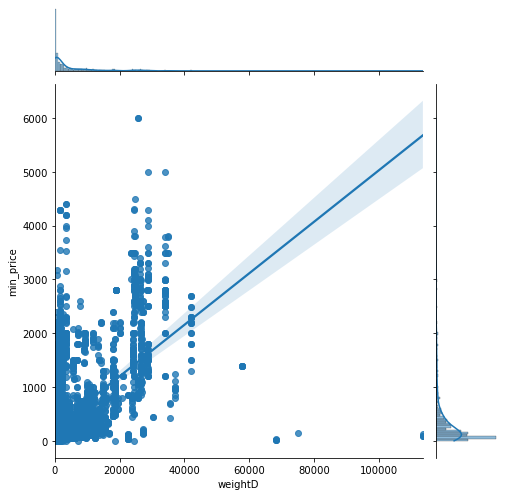

In [11]:
sns.jointplot(data=new_data1, x="weightD", y="min_price", kind='reg', height = 7)

In [12]:
new_data1[new_data1.weightD>100000].iloc[:,[1,12,14,15,16]]

,max_price,name,weight,weightD,weightT
3803,83.45,"Peerless - SmartMount Tilt TV Wall Mount for 42 - 71"" Flat-Panel TVs - Black""",250 pounds,113500.0,g
3804,95.99,"Peerless - SmartMount Tilt TV Wall Mount for 42 - 71"" Flat-Panel TVs - Black""",250 pounds,113500.0,g
3805,95.99,"Peerless - SmartMount Tilt TV Wall Mount for 42 - 71"" Flat-Panel TVs - Black""",250 pounds,113500.0,g
3806,123.28,"Peerless - SmartMount Tilt TV Wall Mount for 42 - 71"" Flat-Panel TVs - Black""",250 pounds,113500.0,g


## Duplicated rows

In [13]:
data[data.duplicated(keep= False)]

,prod_id,max_price,min_price,currency,price_dateseen,seller,shipping_info,brand,categories,date_added,date_updated,manufacturer,name,pri_cats,weight
1666,AVpg9lcJ1cnluZ0-8h3k,4295.98,4295.98,USD,2018-05-26T07:00:00Z,Bestbuy.com,NaN,SunBriteTV,"LED & LCD TVs,TVs,Outdoor TVs,All Flat-Screen TVs,Electronics,Television & Video,Televisions,TVs Entertainment,TV & Home Theater,All Flat-Panel TVs",2016-09-03T17:22:23Z,2018-05-16T16:25:57Z,NaN,Pro-Series 49-Class Full HD Outdoor LED TV (Silver),Electronics,4.00 lb
1667,AVpg9lcJ1cnluZ0-8h3k,4295.98,4295.98,USD,2018-05-26T07:00:00Z,Bestbuy.com,NaN,SunBriteTV,"LED & LCD TVs,TVs,Outdoor TVs,All Flat-Screen TVs,Electronics,Television & Video,Televisions,TVs Entertainment,TV & Home Theater,All Flat-Panel TVs",2016-09-03T17:22:23Z,2018-05-16T16:25:57Z,NaN,Pro-Series 49-Class Full HD Outdoor LED TV (Silver),Electronics,4.00 lb
1964,AVqVGTt2v8e3D1O-ldE7,2799.99,2799.99,USD,2018-05-26T07:00:00Z,Bestbuy.com,NaN,SunBriteTV,"LED & LCD TVs,TVs,Outdoor TVs,Electronics,Television & Video,Televisions,TVs Entertainment,TV & Home Theater,All Flat-Panel TVs",2017-03-03T16:55:43Z,2018-06-13T19:36:45Z,NaN,"SunBriteTV - Signature Series - 43 Class - LED - Outdoor - Partial Sun - 2160p - 4K UHD TV with HDR""",Electronics,41.5 pounds
1966,AVqVGTt2v8e3D1O-ldE7,2799.99,2799.99,USD,2018-05-26T07:00:00Z,Bestbuy.com,NaN,SunBriteTV,"LED & LCD TVs,TVs,Outdoor TVs,Electronics,Television & Video,Televisions,TVs Entertainment,TV & Home Theater,All Flat-Panel TVs",2017-03-03T16:55:43Z,2018-06-13T19:36:45Z,NaN,"SunBriteTV - Signature Series - 43 Class - LED - Outdoor - Partial Sun - 2160p - 4K UHD TV with HDR""",Electronics,41.5 pounds
1968,AVqVGTt2v8e3D1O-ldE7,2799.99,2799.99,USD,2018-05-26T07:00:00Z,Bestbuy.com,NaN,SunBriteTV,"LED & LCD TVs,TVs,Outdoor TVs,Electronics,Television & Video,Televisions,TVs Entertainment,TV & Home Theater,All Flat-Panel TVs",2017-03-03T16:55:43Z,2018-06-13T19:36:45Z,NaN,"SunBriteTV - Signature Series - 43 Class - LED - Outdoor - Partial Sun - 2160p - 4K UHD TV with HDR""",Electronics,41.5 pounds


# Dropping columns

Prod_id – we used the product name instead of the ID for analysis.

Dropping the single value of CAD as majority of values are in USD.

Manufacturer is not as significant to consumers as brand; also, more than 50% values missing.
Even if we impute values, we will impute from brand and hence we will just work with brand and drop manufacturer columns.

pri_cats majority are lumped into Electronics; not useful at all

And lastly, we decided to drop the weight column as well, as it has no correlation to price.

In [14]:
data.drop(columns = ['prod_id','currency','shipping_info','manufacturer','pri_cats'], inplace = True)

# Following columns are dropped because...
# Prod_id is not informational.
# Dropping the single value of CAD as majority of values are in USD.
# Manufacturer is not as significant to consumers as brand; also, more than 50% values missing
# pri_cats majority are lumped into Electronics; not meaningful
# Shipping info column contains 2972 missing values;
# weight column is correlated to shipping info, hence it has been dropped as well.

In [15]:
data.info()

# No more null values in dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7249 entries, 0 to 7248
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   max_price       7249 non-null   float64
 1   min_price       7249 non-null   float64
 2   price_dateseen  7249 non-null   object 
 3   seller          7249 non-null   object 
 4   brand           7249 non-null   object 
 5   categories      7249 non-null   object 
 6   date_added      7249 non-null   object 
 7   date_updated    7249 non-null   object 
 8   name            7249 non-null   object 
 9   weight          7249 non-null   object 
dtypes: float64(2), object(8)
memory usage: 566.5+ KB


# Data preprocessing

## Adding new columns for analysation

New columns are:
dateaddMon,
dateaddHour,
durationD,
weekday,
Month

In [16]:
new_data2 = new_data1.copy()

key_web = ['.com','-com']

def online(df):
    for i in df.index:
        store = df.at[i,'seller']
        for j in key_web:
            if any(j in store for j in key_web):
                df.at[i,'online'] = 1
            else:
                df.at[i,'online'] = 0
        
online(new_data2)

new_data2.online.value_counts(normalize = True)

1.0    0.699131
0.0    0.300869
Name: online, dtype: float64

In [17]:
new_data2['date_added'] = pd.to_datetime(new_data2['date_added'])
new_data2['date_updated'] = pd.to_datetime(new_data2['date_updated'])
new_data2['dateaddMon'] = pd.to_datetime(new_data2['date_added']).dt.to_period('M')
new_data2['dateaddHour'] = pd.to_datetime(new_data2['date_added']).dt.to_period('H').dt.hour
new_data2['durationD'] = (new_data2['date_updated'] - new_data2['date_added']).dt.days
new_data2['weekday'] = new_data2['date_added'].dt.day_name()
new_data2['Month'] = new_data2['date_added'].dt.month_name()


new_data2


C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


,prod_id,max_price,min_price,currency,price_dateseen,seller,shipping_info,brand,categories,date_added,date_updated,manufacturer,name,pri_cats,weight,weightD,weightT,online,dateaddMon,dateaddHour,durationD,weekday,Month
0,AVphzgbJLJeJML43fA0o,104.99,104.99,USD,"2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017-03-04T10:00:00Z,2017-03-03T14:00:00Z",Bestbuy.com,NaN,Sanus,"Audio & Video Accessories,TV Mounts,TV Accessories & Parts,Electronics,A/V Presentation,Accessories & Supplies,TV Ceiling & Wall Mounts",2015-04-13 12:00:51+00:00,2018-05-12 18:59:48+00:00,NaN,Sanus VLF410B1 10-Inch Super Slim Full-Motion Mount for 37 - 84 Inches TV's,Electronics,32.8 pounds,14891.199654,g,1.0,2015-04,12,1125,Monday,April
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,USD,2017-12-14T06:00:00Z,Walmart.com,Expedited,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video & Home Audio,Speaker Systems,Portable Audio & Video,Electronics,See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo...,Speakers,Home Audio & Theater,All Home Speakers,Consumer Electronics,See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3...,Home Theater Systems,MP3 Player Accessories,Home Audio,Audio,Cell,Stereo Shelf Systems",2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Electronics,14 pounds,6356.000000,g,1.0,2015-05,14,1122,Monday,May
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,USD,2017-09-08T05:00:00Z,Walmart.com,Expedited,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video & Home Audio,Speaker Systems,Portable Audio & Video,Electronics,See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo...,Speakers,Home Audio & Theater,All Home Speakers,Consumer Electronics,See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3...,Home Theater Systems,MP3 Player Accessories,Home Audio,Audio,Cell,Stereo Shelf Systems",2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Electronics,14 pounds,6356.000000,g,1.0,2015-05,14,1122,Monday,May
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,USD,2017-10-10T05:00:00Z,Bestbuy.com,NaN,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video & Home Audio,Speaker Systems,Portable Audio & Video,Electronics,See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo...,Speakers,Home Audio & Theater,All Home Speakers,Consumer Electronics,See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3...,Home Theater Systems,MP3 Player Accessories,Home Audio,Audio,Cell,Stereo Shelf Systems",2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Electronics,14 pounds,6356.000000,g,1.0,2015-05,14,1122,Monday,May
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,USD,2017-08-28T07:00:00Z,Bestbuy.com,NaN,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video & Home Audio,Speaker Systems,Portable Audio & Video,Electronics,See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo...,Speakers,Home Audio & Theater,All Home Speakers,Consumer Electronics,See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3...,Home Theater Systems,MP3 Player Accessories,Home Audio,Audio,Cell,Stereo Shelf Systems",2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Electronics,14 pounds,6356.000000,g,1.0,2015-05,14,1122,Monday,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,AVpfUsrxLJeJML437Ezd,79.99,79.99,USD,2017-10-10T08:00:00Z,Bestbuy.com,NaN,Lowepro,"Camera & Photo Accessories,Cameras, Camcorders & Optics,Cameras & Photo,Camera Accessories,Digital Camera Accessories,Cases, Bags & Covers,Camera Bags & Cases,Frys,Electronics,Camera Backpacks,Cameras & Camcorders,Photography,Camera Bags,Photography Bags Cases,Sling Bags,Backpacks,Camera Bags, Cases & Straps,Bags & Cases",2016-06-10 18:41:15+00:00,2018-06-13 20:13:06+00:00,Lowepro,Lowepro - Slingshot Edge 250 AW Camera Backpack - Black,Electronics,1.8 pounds,817

In [18]:
new_data_1 = new_data2.copy()

for i in new_data_1.index:
    new_data_1['price_dateseen'][i]= new_data_1.price_dateseen[i].strip().split(',')
    new_data_1['price_dateseen'][i]=len(new_data_1['price_dateseen'][i])
new_data_1

# Frequency count of the number of times this product's prices has been viewed

<ipython-input-18-947855113ece>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_1['price_dateseen'][i]= new_data_1.price_dateseen[i].strip().split(',')
<ipython-input-18-947855113ece>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_1['price_dateseen'][i]=len(new_data_1['price_dateseen'][i])


,prod_id,max_price,min_price,currency,price_dateseen,seller,shipping_info,brand,categories,date_added,date_updated,manufacturer,name,pri_cats,weight,weightD,weightT,online,dateaddMon,dateaddHour,durationD,weekday,Month
0,AVphzgbJLJeJML43fA0o,104.99,104.99,USD,4,Bestbuy.com,NaN,Sanus,"Audio & Video Accessories,TV Mounts,TV Accessories & Parts,Electronics,A/V Presentation,Accessories & Supplies,TV Ceiling & Wall Mounts",2015-04-13 12:00:51+00:00,2018-05-12 18:59:48+00:00,NaN,Sanus VLF410B1 10-Inch Super Slim Full-Motion Mount for 37 - 84 Inches TV's,Electronics,32.8 pounds,14891.199654,g,1.0,2015-04,12,1125,Monday,April
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,USD,1,Walmart.com,Expedited,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video & Home Audio,Speaker Systems,Portable Audio & Video,Electronics,See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo...,Speakers,Home Audio & Theater,All Home Speakers,Consumer Electronics,See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3...,Home Theater Systems,MP3 Player Accessories,Home Audio,Audio,Cell,Stereo Shelf Systems",2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Electronics,14 pounds,6356.000000,g,1.0,2015-05,14,1122,Monday,May
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,USD,1,Walmart.com,Expedited,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video & Home Audio,Speaker Systems,Portable Audio & Video,Electronics,See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo...,Speakers,Home Audio & Theater,All Home Speakers,Consumer Electronics,See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3...,Home Theater Systems,MP3 Player Accessories,Home Audio,Audio,Cell,Stereo Shelf Systems",2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Electronics,14 pounds,6356.000000,g,1.0,2015-05,14,1122,Monday,May
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,USD,1,Bestbuy.com,NaN,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video & Home Audio,Speaker Systems,Portable Audio & Video,Electronics,See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo...,Speakers,Home Audio & Theater,All Home Speakers,Consumer Electronics,See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3...,Home Theater Systems,MP3 Player Accessories,Home Audio,Audio,Cell,Stereo Shelf Systems",2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Electronics,14 pounds,6356.000000,g,1.0,2015-05,14,1122,Monday,May
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,USD,1,Bestbuy.com,NaN,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video & Home Audio,Speaker Systems,Portable Audio & Video,Electronics,See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo...,Speakers,Home Audio & Theater,All Home Speakers,Consumer Electronics,See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3...,Home Theater Systems,MP3 Player Accessories,Home Audio,Audio,Cell,Stereo Shelf Systems",2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Electronics,14 pounds,6356.000000,g,1.0,2015-05,14,1122,Monday,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,AVpfUsrxLJeJML437Ezd,79.99,79.99,USD,1,Bestbuy.com,NaN,Lowepro,"Camera & Photo Accessories,Cameras, Camcorders & Optics,Cameras & Photo,Camera Accessories,Digital Camera Accessories,Cases, Bags & Covers,Camera Bags & Cases,Frys,Electronics,Camera Backpacks,Cameras & Camcorders,Photography,Camera Bags,Photography Bags Cases,Sling Bags,Backpacks,Camera Bags, Cases & Straps,Bags & Cases",2016-06-10 18:41:15+00:00,2018-06-13 20:13:06+00:00,Lowepro,Lowepro - Slingshot Edge 250 AW Camera Backpack - Black,Electronics,1.8 pounds,817.199978,g,1.0,2016-06,18,733,Friday,June
7245,AVpfUsrxLJeJML437Ezd,68.75,68.75,USD,1,bhphotovideo.com,Free Expedited Shipping for most orders over $49,Lowepro,"Camera & Photo Acce

In [19]:
data1 = new_data_1.copy()

## Pulling top 10 brands and grouping into 2s

In [20]:
data1['brand'] = data1.brand.str.lower()
data1

,prod_id,max_price,min_price,currency,price_dateseen,seller,shipping_info,brand,categories,date_added,date_updated,manufacturer,name,pri_cats,weight,weightD,weightT,online,dateaddMon,dateaddHour,durationD,weekday,Month
0,AVphzgbJLJeJML43fA0o,104.99,104.99,USD,4,Bestbuy.com,NaN,sanus,"Audio & Video Accessories,TV Mounts,TV Accessories & Parts,Electronics,A/V Presentation,Accessories & Supplies,TV Ceiling & Wall Mounts",2015-04-13 12:00:51+00:00,2018-05-12 18:59:48+00:00,NaN,Sanus VLF410B1 10-Inch Super Slim Full-Motion Mount for 37 - 84 Inches TV's,Electronics,32.8 pounds,14891.199654,g,1.0,2015-04,12,1125,Monday,April
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,USD,1,Walmart.com,Expedited,boytone,"Stereos,Portable Bluetooth Speakers,TV, Video & Home Audio,Speaker Systems,Portable Audio & Video,Electronics,See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo...,Speakers,Home Audio & Theater,All Home Speakers,Consumer Electronics,See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3...,Home Theater Systems,MP3 Player Accessories,Home Audio,Audio,Cell,Stereo Shelf Systems",2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Electronics,14 pounds,6356.000000,g,1.0,2015-05,14,1122,Monday,May
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,USD,1,Walmart.com,Expedited,boytone,"Stereos,Portable Bluetooth Speakers,TV, Video & Home Audio,Speaker Systems,Portable Audio & Video,Electronics,See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo...,Speakers,Home Audio & Theater,All Home Speakers,Consumer Electronics,See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3...,Home Theater Systems,MP3 Player Accessories,Home Audio,Audio,Cell,Stereo Shelf Systems",2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Electronics,14 pounds,6356.000000,g,1.0,2015-05,14,1122,Monday,May
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,USD,1,Bestbuy.com,NaN,boytone,"Stereos,Portable Bluetooth Speakers,TV, Video & Home Audio,Speaker Systems,Portable Audio & Video,Electronics,See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo...,Speakers,Home Audio & Theater,All Home Speakers,Consumer Electronics,See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3...,Home Theater Systems,MP3 Player Accessories,Home Audio,Audio,Cell,Stereo Shelf Systems",2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Electronics,14 pounds,6356.000000,g,1.0,2015-05,14,1122,Monday,May
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,USD,1,Bestbuy.com,NaN,boytone,"Stereos,Portable Bluetooth Speakers,TV, Video & Home Audio,Speaker Systems,Portable Audio & Video,Electronics,See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo...,Speakers,Home Audio & Theater,All Home Speakers,Consumer Electronics,See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3...,Home Theater Systems,MP3 Player Accessories,Home Audio,Audio,Cell,Stereo Shelf Systems",2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Electronics,14 pounds,6356.000000,g,1.0,2015-05,14,1122,Monday,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,AVpfUsrxLJeJML437Ezd,79.99,79.99,USD,1,Bestbuy.com,NaN,lowepro,"Camera & Photo Accessories,Cameras, Camcorders & Optics,Cameras & Photo,Camera Accessories,Digital Camera Accessories,Cases, Bags & Covers,Camera Bags & Cases,Frys,Electronics,Camera Backpacks,Cameras & Camcorders,Photography,Camera Bags,Photography Bags Cases,Sling Bags,Backpacks,Camera Bags, Cases & Straps,Bags & Cases",2016-06-10 18:41:15+00:00,2018-06-13 20:13:06+00:00,Lowepro,Lowepro - Slingshot Edge 250 AW Camera Backpack - Black,Electronics,1.8 pounds,817.199978,g,1.0,2016-06,18,733,Friday,June
7245,AVpfUsrxLJeJML437Ezd,68.75,68.75,USD,1,bhphotovideo.com,Free Expedited Shipping for most orders over $49,lowepro,"Camera & Photo Acce

In [21]:
brand_map = {"sony": 1, "samsung" : 1, "apple": 2, "yamaha": 2, "corsair": 3, "pioneer":3, "lg": 4, 
             "sandisk":4, "logitech":5, "asus":5}

data1["brandrank_group"] = data1.brand.map(lambda x: brand_map.get(x, 6))

In [22]:
for i in data1.index:
    
    if data1.brandrank_group[i] == 1:
        data1.at[i,'brand_rank']='sony & samsung'
        
    elif data1.brandrank_group[i]==2:
        data1.at[i,'brand_rank']='apple & yamaha'
        
    elif data1.brandrank_group[i]==3:
        data1.at[i,'brand_rank']='corsair & pioneer'  
        
    elif data1.brandrank_group[i]==4:
        data1.at[i,'brand_rank']='lg & sandisk'
        
    elif data1.brandrank_group[i]==5:
        data1.at[i,'brand_rank']='logitech & asus'
        
    elif data1.brandrank_group[i]==6:
        data1.at[i,'brand_rank']='other_brand'
        
    else:
        data1.at[i,'brand_rank']='none' 

data1

,prod_id,max_price,min_price,currency,price_dateseen,seller,shipping_info,brand,categories,date_added,date_updated,manufacturer,name,pri_cats,weight,weightD,weightT,online,dateaddMon,dateaddHour,durationD,weekday,Month,brandrank_group,brand_rank
0,AVphzgbJLJeJML43fA0o,104.99,104.99,USD,4,Bestbuy.com,NaN,sanus,"Audio & Video Accessories,TV Mounts,TV Accessories & Parts,Electronics,A/V Presentation,Accessories & Supplies,TV Ceiling & Wall Mounts",2015-04-13 12:00:51+00:00,2018-05-12 18:59:48+00:00,NaN,Sanus VLF410B1 10-Inch Super Slim Full-Motion Mount for 37 - 84 Inches TV's,Electronics,32.8 pounds,14891.199654,g,1.0,2015-04,12,1125,Monday,April,6,other_brand
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,USD,1,Walmart.com,Expedited,boytone,"Stereos,Portable Bluetooth Speakers,TV, Video & Home Audio,Speaker Systems,Portable Audio & Video,Electronics,See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo...,Speakers,Home Audio & Theater,All Home Speakers,Consumer Electronics,See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3...,Home Theater Systems,MP3 Player Accessories,Home Audio,Audio,Cell,Stereo Shelf Systems",2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Electronics,14 pounds,6356.000000,g,1.0,2015-05,14,1122,Monday,May,6,other_brand
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,USD,1,Walmart.com,Expedited,boytone,"Stereos,Portable Bluetooth Speakers,TV, Video & Home Audio,Speaker Systems,Portable Audio & Video,Electronics,See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo...,Speakers,Home Audio & Theater,All Home Speakers,Consumer Electronics,See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3...,Home Theater Systems,MP3 Player Accessories,Home Audio,Audio,Cell,Stereo Shelf Systems",2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Electronics,14 pounds,6356.000000,g,1.0,2015-05,14,1122,Monday,May,6,other_brand
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,USD,1,Bestbuy.com,NaN,boytone,"Stereos,Portable Bluetooth Speakers,TV, Video & Home Audio,Speaker Systems,Portable Audio & Video,Electronics,See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo...,Speakers,Home Audio & Theater,All Home Speakers,Consumer Electronics,See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3...,Home Theater Systems,MP3 Player Accessories,Home Audio,Audio,Cell,Stereo Shelf Systems",2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Electronics,14 pounds,6356.000000,g,1.0,2015-05,14,1122,Monday,May,6,other_brand
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,USD,1,Bestbuy.com,NaN,boytone,"Stereos,Portable Bluetooth Speakers,TV, Video & Home Audio,Speaker Systems,Portable Audio & Video,Electronics,See more Black BOYTONE Bt-210f 30 Watt FM Radio Bluetoo...,Speakers,Home Audio & Theater,All Home Speakers,Consumer Electronics,See more BOYTONE Bt-210f Bluetooth Wireless Speaker Mp3...,Home Theater Systems,MP3 Player Accessories,Home Audio,Audio,Cell,Stereo Shelf Systems",2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - Black Diamond,Electronics,14 pounds,6356.000000,g,1.0,2015-05,14,1122,Monday,May,6,other_brand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,AVpfUsrxLJeJML437Ezd,79.99,79.99,USD,1,Bestbuy.com,NaN,lowepro,"Camera & Photo Accessories,Cameras, Camcorders & Optics,Cameras & Photo,Camera Accessories,Digital Camera Accessories,Cases, Bags & Covers,Camera Bags & Cases,Frys,Electronics,Camera Backpacks,Cameras & Camcorders,Photography,Camera Bags,Photography Bags Cases,Sling Bags,Backpacks,Camera Bags, Cases & Straps,Bags & Cases",2016-06-10 18:41:15+00:00,2018-06-13 20:13:06+00:00,Lowepro,Lowepro - Slingshot Edge 250 AW Camera Backpack - Black,Electronics,1.8 pounds,817.199978,g,1.0,2016-06,18,733,Friday,June,6,other_brand
7245,AVpfUsrxLJeJML

In [23]:
data1.brandrank_group.value_counts()

6    4319
1    1529
2     488
3     371
4     313
5     229
Name: brandrank_group, dtype: int64

## Cleaning up the strings in columns

Using Count Vectorizer - tokenizing (means breaking down a sentence or paragraph or any text into words) the text along with performing very basic preprocessing like removing the punctuation marks, converting all the words to lowercase, etc.

Prior to Milestone #4, we used the Bag of Words approach with Natural Language Toolkit (NLTK) to count the number of words occurrances in the category column. We streamlined this with the product name and extracted the common words. We then used a rule-based system to sort the products into the new categories - car, camera, portable, home, computer, others.

In [24]:
def clean(text):
    text = re.sub(r'[\W]+', ' ', text.lower())
    return text

cleanstrings_data = data1.copy()

cleanstrings_data.brand = cleanstrings_data.brand.apply(clean)
cleanstrings_data.seller = cleanstrings_data.seller.apply(clean)
cleanstrings_data.categories = cleanstrings_data.categories.apply(clean)
cleanstrings_data.name = cleanstrings_data.name.apply(clean)
cleanstrings_data['price_dateseen']=cleanstrings_data['price_dateseen'].astype(str).astype(int)


cleanstrings_data

# We will be checking for correlation between brand and seller, hence strings need to be cleaned up.
# Product name is cleaned up as it'll be checked for correlation with categories as well.
# We will explore categories column to identify product popularity. 

,prod_id,max_price,min_price,currency,price_dateseen,seller,shipping_info,brand,categories,date_added,date_updated,manufacturer,name,pri_cats,weight,weightD,weightT,online,dateaddMon,dateaddHour,durationD,weekday,Month,brandrank_group,brand_rank
0,AVphzgbJLJeJML43fA0o,104.99,104.99,USD,4,bestbuy com,NaN,sanus,audio video accessories tv mounts tv accessories parts electronics a v presentation accessories supplies tv ceiling wall mounts,2015-04-13 12:00:51+00:00,2018-05-12 18:59:48+00:00,NaN,sanus vlf410b1 10 inch super slim full motion mount for 37 84 inches tv s,Electronics,32.8 pounds,14891.199654,g,1.0,2015-04,12,1125,Monday,April,6,other_brand
1,AVpgMuGwLJeJML43KY_c,69.00,64.99,USD,1,walmart com,Expedited,boytone,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,Boytone,boytone 2500w 2 1 ch home theater system black diamond,Electronics,14 pounds,6356.000000,g,1.0,2015-05,14,1122,Monday,May,6,other_brand
2,AVpgMuGwLJeJML43KY_c,69.00,69.00,USD,1,walmart com,Expedited,boytone,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,Boytone,boytone 2500w 2 1 ch home theater system black diamond,Electronics,14 pounds,6356.000000,g,1.0,2015-05,14,1122,Monday,May,6,other_brand
3,AVpgMuGwLJeJML43KY_c,69.99,69.99,USD,1,bestbuy com,NaN,boytone,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,Boytone,boytone 2500w 2 1 ch home theater system black diamond,Electronics,14 pounds,6356.000000,g,1.0,2015-05,14,1122,Monday,May,6,other_brand
4,AVpgMuGwLJeJML43KY_c,66.99,66.99,USD,1,bestbuy com,NaN,boytone,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,2015-05-18 14:14:56+00:00,2018-06-13 19:39:02+00:00,Boytone,boytone 2500w 2 1 ch home theater system black diamond,Electronics,14 pounds,6356.000000,g,1.0,2015-05,14,1122,Monday,May,6,other_brand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,AVpfUsrxLJeJML437Ezd,79.99,79.99,USD,1,bestbuy com,NaN,lowepro,camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessories cases bags covers camera bags cases frys electronics camera backpacks cameras camcorders photography camera bags photography bags cases sling bags backpacks camera bags cases straps bags cases,2016-06-10 18:41:15+00:00,2018-06-13 20:13:06+00:00,Lowepro,lowepro slingshot edge 250 aw camera backpack black,Electronics,1.8 pounds,817.199978,g,1.0,2016-06,18,733,Friday,June,6,other_brand
7245,AVpfUsrxLJeJML437Ezd,68.75,68.75,USD,1,bhphotovideo com,Free Expedited Shipping for most orders over $49,lowepro,camera photo acces

In [25]:
data1 = cleanstrings_data[['weightD','min_price','max_price','date_added', 'dateaddHour', 'weekday', 'Month', 'price_dateseen','durationD','online','name','brand','seller','categories','brand_rank']]

data1
# Rearranging columns for easier viewing

,weightD,min_price,max_price,date_added,dateaddHour,weekday,Month,price_dateseen,durationD,online,name,brand,seller,categories,brand_rank
0,14891.199654,104.99,104.99,2015-04-13 12:00:51+00:00,12,Monday,April,4,1125,1.0,sanus vlf410b1 10 inch super slim full motion mount for 37 84 inches tv s,sanus,bestbuy com,audio video accessories tv mounts tv accessories parts electronics a v presentation accessories supplies tv ceiling wall mounts,other_brand
1,6356.000000,64.99,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand
2,6356.000000,69.00,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand
3,6356.000000,69.99,69.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand
4,6356.000000,66.99,66.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,817.199978,79.99,79.99,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,bestbuy com,camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessories cases bags covers camera bags cases frys electronics camera backpacks cameras camcorders photography camera bags photography bags cases sling bags backpacks camera bags cases straps bags cases,other_brand
7245,817.199978,68.75,68.75,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,bhphotovideo com,camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessories cases bags covers camera bags cases frys electronics camera backpacks cameras camcorders photography camera bags photography bags cases sling bags backpacks camera bags cases straps bags cases,other_brand
7246,817.199978,70.99,70.99,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,bestbuy com,camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessories cases bags covers camera bags cases frys electronics camera backpacks cameras camcorders photography camera bags photography bags cases sling b

In [26]:
data2 = data1.copy()

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

data2['subcatlem'] = data2.categories.apply(lemmatize_text)

data2.head(1)

,weightD,min_price,max_price,date_added,dateaddHour,weekday,Month,price_dateseen,durationD,online,name,brand,seller,categories,brand_rank,subcatlem
0,14891.199654,104.99,104.99,2015-04-13 12:00:51+00:00,12,Monday,April,4,1125,1.0,sanus vlf410b1 10 inch super slim full motion mount for 37 84 inches tv s,sanus,bestbuy com,audio video accessories tv mounts tv accessories parts electronics a v presentation accessories supplies tv ceiling wall mounts,other_brand,"[audio, video, accessory, tv, mount, tv, accessory, part, electronics, a, v, presentation, accessory, supply, tv, ceiling, wall, mount]"


In [27]:
N = 5

for i, cats  in enumerate(data2['subcatlem']) :
    data2['subcatlem'][i] = Counter(cats)
    data2['subcatlem'][i] = dict(sorted(data2['subcatlem'][i].items(), key = itemgetter(1), reverse = True)[:N]) 

data2.head(3)

# Top 5 most common words in each categories row

<ipython-input-27-485fd5d5e44b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['subcatlem'][i] = Counter(cats)
<ipython-input-27-485fd5d5e44b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['subcatlem'][i] = dict(sorted(data2['subcatlem'][i].items(), key = itemgetter(1), reverse = True)[:N])


,weightD,min_price,max_price,date_added,dateaddHour,weekday,Month,price_dateseen,durationD,online,name,brand,seller,categories,brand_rank,subcatlem
0,14891.199654,104.99,104.99,2015-04-13 12:00:51+00:00,12,Monday,April,4,1125,1.0,sanus vlf410b1 10 inch super slim full motion mount for 37 84 inches tv s,sanus,bestbuy com,audio video accessories tv mounts tv accessories parts electronics a v presentation accessories supplies tv ceiling wall mounts,other_brand,"{'accessory': 3, 'tv': 3, 'mount': 2, 'audio': 1, 'video': 1}"
1,6356.000000,64.99,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"{'speaker': 5, 'home': 5, 'audio': 5, 'system': 3, 'stereo': 2}"
2,6356.000000,69.00,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"{'speaker': 5, 'home': 5, 'audio': 5, 'system': 3, 'stereo': 2}"


In [28]:
for i in data2.index:
    data2['subcatlem'][i]= list(data2['subcatlem'][i].keys())
    
data2

# Concatenating the top 5 common words in each categories row into a list.

<ipython-input-28-43b0ef0d1d8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['subcatlem'][i]= list(data2['subcatlem'][i].keys())


,weightD,min_price,max_price,date_added,dateaddHour,weekday,Month,price_dateseen,durationD,online,name,brand,seller,categories,brand_rank,subcatlem
0,14891.199654,104.99,104.99,2015-04-13 12:00:51+00:00,12,Monday,April,4,1125,1.0,sanus vlf410b1 10 inch super slim full motion mount for 37 84 inches tv s,sanus,bestbuy com,audio video accessories tv mounts tv accessories parts electronics a v presentation accessories supplies tv ceiling wall mounts,other_brand,"[accessory, tv, mount, audio, video]"
1,6356.000000,64.99,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[speaker, home, audio, system, stereo]"
2,6356.000000,69.00,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[speaker, home, audio, system, stereo]"
3,6356.000000,69.99,69.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[speaker, home, audio, system, stereo]"
4,6356.000000,66.99,66.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[speaker, home, audio, system, stereo]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,817.199978,79.99,79.99,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,bestbuy com,camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessories cases bags covers camera bags cases frys electronics camera backpacks cameras camcorders photography camera bags photography bags cases sling bags backpacks camera bags cases straps bags cases,other_brand,"[camera, bag, case, accessory, photo]"
7245,817.199978,68.75,68.75,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,bhphotovideo com,camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessories cases bags covers camera bags cases frys electronics camera backpacks cameras camcorders photography camera bags photography bags cases sling bags backpacks camera bags cases straps bags cases,other_brand,"[camera, bag, case, accessory, photo]"
7246,817.199978,70.99,70.99,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw

In [29]:
def Convert(string): 
    li = list(string.split(" ")) 
    return li 

data2['name_new'] = data2.name.apply(Convert)
data2

,weightD,min_price,max_price,date_added,dateaddHour,weekday,Month,price_dateseen,durationD,online,name,brand,seller,categories,brand_rank,subcatlem,name_new
0,14891.199654,104.99,104.99,2015-04-13 12:00:51+00:00,12,Monday,April,4,1125,1.0,sanus vlf410b1 10 inch super slim full motion mount for 37 84 inches tv s,sanus,bestbuy com,audio video accessories tv mounts tv accessories parts electronics a v presentation accessories supplies tv ceiling wall mounts,other_brand,"[accessory, tv, mount, audio, video]","[sanus, vlf410b1, 10, inch, super, slim, full, motion, mount, for, 37, 84, inches, tv, s]"
1,6356.000000,64.99,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[speaker, home, audio, system, stereo]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]"
2,6356.000000,69.00,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[speaker, home, audio, system, stereo]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]"
3,6356.000000,69.99,69.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[speaker, home, audio, system, stereo]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]"
4,6356.000000,66.99,66.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[speaker, home, audio, system, stereo]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,817.199978,79.99,79.99,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,bestbuy com,camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessories cases bags covers camera bags cases frys electronics camera backpacks cameras camcorders photography camera bags photography bags cases sling bags backpacks camera bags cases straps bags cases,other_brand,"[camera, bag, case, accessory, photo]","[lowepro, slingshot, edge, 250, aw, camera, backpack, black]"
7245,817.199978,68.75,68.75,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,bhphotovideo com,camera photo accessories

In [30]:
data3 = data2.copy()

for i in data3.index:
    prod_name = data3.at[i,'name_new']
    cat_name = data3.subcatlem[i]
    list3 = set(cat_name) & set(prod_name)
    list4 = sorted(list3, key = lambda k : cat_name.index(k))
    data3['subcatlem'][i]= list4

data3.rename(columns = {'subcatlem' : 'cat_in_name'}, inplace = True)

data3

<ipython-input-30-a4af37aa4948>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['subcatlem'][i]= list4


,weightD,min_price,max_price,date_added,dateaddHour,weekday,Month,price_dateseen,durationD,online,name,brand,seller,categories,brand_rank,cat_in_name,name_new
0,14891.199654,104.99,104.99,2015-04-13 12:00:51+00:00,12,Monday,April,4,1125,1.0,sanus vlf410b1 10 inch super slim full motion mount for 37 84 inches tv s,sanus,bestbuy com,audio video accessories tv mounts tv accessories parts electronics a v presentation accessories supplies tv ceiling wall mounts,other_brand,"[tv, mount]","[sanus, vlf410b1, 10, inch, super, slim, full, motion, mount, for, 37, 84, inches, tv, s]"
1,6356.000000,64.99,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]"
2,6356.000000,69.00,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]"
3,6356.000000,69.99,69.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]"
4,6356.000000,66.99,66.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,817.199978,79.99,79.99,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,bestbuy com,camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessories cases bags covers camera bags cases frys electronics camera backpacks cameras camcorders photography camera bags photography bags cases sling bags backpacks camera bags cases straps bags cases,other_brand,[camera],"[lowepro, slingshot, edge, 250, aw, camera, backpack, black]"
7245,817.199978,68.75,68.75,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,bhphotovideo com,camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessories cases bags covers camera bags cases frys electronics camera bac

In [31]:
for index, row in data3.iterrows():
    if ((data3["cat_in_name"][index])==[]) :
        data3.cat_in_name[index] = data2.subcatlem[index][:3]
data3

# We are replacing rows with zero matches with the top 3 words in their category value instead.

<ipython-input-31-f1596c0cece1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.cat_in_name[index] = data2.subcatlem[index][:3]


,weightD,min_price,max_price,date_added,dateaddHour,weekday,Month,price_dateseen,durationD,online,name,brand,seller,categories,brand_rank,cat_in_name,name_new
0,14891.199654,104.99,104.99,2015-04-13 12:00:51+00:00,12,Monday,April,4,1125,1.0,sanus vlf410b1 10 inch super slim full motion mount for 37 84 inches tv s,sanus,bestbuy com,audio video accessories tv mounts tv accessories parts electronics a v presentation accessories supplies tv ceiling wall mounts,other_brand,"[tv, mount]","[sanus, vlf410b1, 10, inch, super, slim, full, motion, mount, for, 37, 84, inches, tv, s]"
1,6356.000000,64.99,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]"
2,6356.000000,69.00,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]"
3,6356.000000,69.99,69.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]"
4,6356.000000,66.99,66.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,817.199978,79.99,79.99,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,bestbuy com,camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessories cases bags covers camera bags cases frys electronics camera backpacks cameras camcorders photography camera bags photography bags cases sling bags backpacks camera bags cases straps bags cases,other_brand,[camera],"[lowepro, slingshot, edge, 250, aw, camera, backpack, black]"
7245,817.199978,68.75,68.75,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,bhphotovideo com,camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessories cases bags covers camera bags cases frys electronics camera bac

In [32]:
results = Counter()
data3['cat_in_name'].apply(results.update)
common_words = results.most_common()

common_words

[('tv', 887),
 ('speaker', 685),
 ('camera', 498),
 ('drive', 471),
 ('home', 421),
 ('computer', 419),
 ('audio', 374),
 ('bluetooth', 372),
 ('receiver', 342),
 ('4k', 320),
 ('car', 278),
 ('ear', 240),
 ('in', 239),
 ('electronics', 233),
 ('laptop', 229),
 ('headphone', 228),
 ('accessory', 206),
 ('samsung', 187),
 ('digital', 184),
 ('memory', 173),
 ('projector', 151),
 ('smart', 151),
 ('portable', 140),
 ('hard', 140),
 ('monitor', 139),
 ('case', 136),
 ('lens', 125),
 ('wireless', 122),
 ('desktop', 122),
 ('external', 120),
 ('player', 119),
 ('system', 114),
 ('internal', 114),
 ('subwoofer', 114),
 ('mirrorless', 114),
 ('headset', 101),
 ('amplifier', 99),
 ('battery', 97),
 ('led', 97),
 ('tablet', 96),
 ('router', 95),
 ('storage', 95),
 ('over', 94),
 ('screen', 93),
 ('mouse', 93),
 ('keyboard', 91),
 ('solid', 85),
 ('mount', 80),
 ('adapter', 78),
 ('all', 76),
 ('modem', 75),
 ('charger', 74),
 ('macbook', 74),
 ('dvd', 71),
 ('video', 70),
 ('power', 68),
 ('the

## Categorising

Because the products were poorly classified, we decided to sort them ourselves. Using the bag of words segmentation for taxonomy, we pulled the top 3 most occuring words from each product category, ran them with the product name itself, and pulled out the common words.

Those that didn’t have any common words with the product name, we took the top 3 most occurring word from the category.

In [33]:
data4 = data3.copy()

key_web = ['car']

def online(data4):
    for i in data4.index:
        store = data4.at[i,'cat_in_name']
        for j in key_web:
            if any(j in store for j in key_web):
                data4.at[i,'car']=1
            else:
                data4.at[i,'car']=0
        
online(data4)
data4

,weightD,min_price,max_price,date_added,dateaddHour,weekday,Month,price_dateseen,durationD,online,name,brand,seller,categories,brand_rank,cat_in_name,name_new,car
0,14891.199654,104.99,104.99,2015-04-13 12:00:51+00:00,12,Monday,April,4,1125,1.0,sanus vlf410b1 10 inch super slim full motion mount for 37 84 inches tv s,sanus,bestbuy com,audio video accessories tv mounts tv accessories parts electronics a v presentation accessories supplies tv ceiling wall mounts,other_brand,"[tv, mount]","[sanus, vlf410b1, 10, inch, super, slim, full, motion, mount, for, 37, 84, inches, tv, s]",0.0
1,6356.000000,64.99,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0
2,6356.000000,69.00,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0
3,6356.000000,69.99,69.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0
4,6356.000000,66.99,66.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,817.199978,79.99,79.99,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,bestbuy com,camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessories cases bags covers camera bags cases frys electronics camera backpacks cameras camcorders photography camera bags photography bags cases sling bags backpacks camera bags cases straps bags cases,other_brand,[camera],"[lowepro, slingshot, edge, 250, aw, camera, backpack, black]",0.0
7245,817.199978,68.75,68.75,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,bhphotovideo com,camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessories cases bags covers camera bags c

In [34]:
key_web = ['camera','lens','mirrorless']

def online(data4):
    for i in data4.index:
        store = data4.at[i,'cat_in_name']
        for j in key_web:
            if any(j in store for j in key_web):
                data4.at[i,'camera'] = 1
            else:
                data4.at[i,'camera']=0
        
online(data4)
data4

,weightD,min_price,max_price,date_added,dateaddHour,weekday,Month,price_dateseen,durationD,online,name,brand,seller,categories,brand_rank,cat_in_name,name_new,car,camera
0,14891.199654,104.99,104.99,2015-04-13 12:00:51+00:00,12,Monday,April,4,1125,1.0,sanus vlf410b1 10 inch super slim full motion mount for 37 84 inches tv s,sanus,bestbuy com,audio video accessories tv mounts tv accessories parts electronics a v presentation accessories supplies tv ceiling wall mounts,other_brand,"[tv, mount]","[sanus, vlf410b1, 10, inch, super, slim, full, motion, mount, for, 37, 84, inches, tv, s]",0.0,0.0
1,6356.000000,64.99,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0
2,6356.000000,69.00,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0
3,6356.000000,69.99,69.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0
4,6356.000000,66.99,66.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,817.199978,79.99,79.99,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,bestbuy com,camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessories cases bags covers camera bags cases frys electronics camera backpacks cameras camcorders photography camera bags photography bags cases sling bags backpacks camera bags cases straps bags cases,other_brand,[camera],"[lowepro, slingshot, edge, 250, aw, camera, backpack, black]",0.0,1.0
7245,817.199978,68.75,68.75,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,bhphotovideo com,camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessor

In [35]:
key_web = ['bluetooth','portable','headset','headphone', 'outdoor', 'outdoors', 'wireless bluetooth', 'audio']

def online(df):
    for i in df.index:
        store = df.at[i,'cat_in_name']
        for j in key_web:
            if any(j in store for j in key_web):
                df.at[i,'portable'] = 1
            else:
                df.at[i,'portable'] = 0
        
online(data4)
data4

,weightD,min_price,max_price,date_added,dateaddHour,weekday,Month,price_dateseen,durationD,online,name,brand,seller,categories,brand_rank,cat_in_name,name_new,car,camera,portable
0,14891.199654,104.99,104.99,2015-04-13 12:00:51+00:00,12,Monday,April,4,1125,1.0,sanus vlf410b1 10 inch super slim full motion mount for 37 84 inches tv s,sanus,bestbuy com,audio video accessories tv mounts tv accessories parts electronics a v presentation accessories supplies tv ceiling wall mounts,other_brand,"[tv, mount]","[sanus, vlf410b1, 10, inch, super, slim, full, motion, mount, for, 37, 84, inches, tv, s]",0.0,0.0,0.0
1,6356.000000,64.99,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0
2,6356.000000,69.00,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0
3,6356.000000,69.99,69.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0
4,6356.000000,66.99,66.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,817.199978,79.99,79.99,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,bestbuy com,camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessories cases bags covers camera bags cases frys electronics camera backpacks cameras camcorders photography camera bags photography bags cases sling bags backpacks camera bags cases straps bags cases,other_brand,[camera],"[lowepro, slingshot, edge, 250, aw, camera, backpack, black]",0.0,1.0,0.0
7245,817.199978,68.75,68.75,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,bhphotovideo com,camera photo accessories cameras camcorders optics cameras photo camer

In [36]:
key_web = ['tv','home','4k','projector','smart','system','subwoofer','mount','theater','audio','sound']

def online(df):
    for i in df.index:
        store = df.at[i,'cat_in_name']
        for j in key_web:
            if any(j in store for j in key_web):
                df.at[i,'home'] = 1
            else:
                df.at[i,'home'] = 0
        
online(data4)
data4

,weightD,min_price,max_price,date_added,dateaddHour,weekday,Month,price_dateseen,durationD,online,name,brand,seller,categories,brand_rank,cat_in_name,name_new,car,camera,portable,home
0,14891.199654,104.99,104.99,2015-04-13 12:00:51+00:00,12,Monday,April,4,1125,1.0,sanus vlf410b1 10 inch super slim full motion mount for 37 84 inches tv s,sanus,bestbuy com,audio video accessories tv mounts tv accessories parts electronics a v presentation accessories supplies tv ceiling wall mounts,other_brand,"[tv, mount]","[sanus, vlf410b1, 10, inch, super, slim, full, motion, mount, for, 37, 84, inches, tv, s]",0.0,0.0,0.0,1.0
1,6356.000000,64.99,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0
2,6356.000000,69.00,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0
3,6356.000000,69.99,69.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0
4,6356.000000,66.99,66.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,817.199978,79.99,79.99,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,bestbuy com,camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessories cases bags covers camera bags cases frys electronics camera backpacks cameras camcorders photography camera bags photography bags cases sling bags backpacks camera bags cases straps bags cases,other_brand,[camera],"[lowepro, slingshot, edge, 250, aw, camera, backpack, black]",0.0,1.0,0.0,0.0
7245,817.199978,68.75,68.75,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,bhphotovideo com,camera photo accessories cameras camc

In [37]:
key_web = ['computer','laptop','drive','memory','monitor','desktop','tablet','internal',
           'external','hard','storage','mouse','keyboard', 'wireless modem']

def online(df):
    for i in df.index:
        store = df.at[i,'cat_in_name']
        for j in key_web:
            if any(j in store for j in key_web):
                df.at[i,'computer']=1
            else:
                df.at[i,'computer']=0
        
online(data4)
data4

,weightD,min_price,max_price,date_added,dateaddHour,weekday,Month,price_dateseen,durationD,online,name,brand,seller,categories,brand_rank,cat_in_name,name_new,car,camera,portable,home,computer
0,14891.199654,104.99,104.99,2015-04-13 12:00:51+00:00,12,Monday,April,4,1125,1.0,sanus vlf410b1 10 inch super slim full motion mount for 37 84 inches tv s,sanus,bestbuy com,audio video accessories tv mounts tv accessories parts electronics a v presentation accessories supplies tv ceiling wall mounts,other_brand,"[tv, mount]","[sanus, vlf410b1, 10, inch, super, slim, full, motion, mount, for, 37, 84, inches, tv, s]",0.0,0.0,0.0,1.0,0.0
1,6356.000000,64.99,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0
2,6356.000000,69.00,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0
3,6356.000000,69.99,69.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0
4,6356.000000,66.99,66.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,817.199978,79.99,79.99,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,bestbuy com,camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessories cases bags covers camera bags cases frys electronics camera backpacks cameras camcorders photography camera bags photography bags cases sling bags backpacks camera bags cases straps bags cases,other_brand,[camera],"[lowepro, slingshot, edge, 250, aw, camera, backpack, black]",0.0,1.0,0.0,0.0,0.0
7245,817.199978,68.75,68.75,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,bhphotovideo com,

In [38]:
for i in data4.index:
    car = data4.at[i,'car']
    camera = data4.at[i,'camera']
    portable = data4.at[i,'portable']
    home = data4.at[i,'home']
    computer = data4.at[i,'computer']
    
    if car == 0 and camera == 0 and portable == 0 and home == 0 and computer == 0:
        data4.at[i,'other_cat'] = 1
    else:
        data4.at[i,'other_cat'] = 0


data4

,weightD,min_price,max_price,date_added,dateaddHour,weekday,Month,price_dateseen,durationD,online,name,brand,seller,categories,brand_rank,cat_in_name,name_new,car,camera,portable,home,computer,other_cat
0,14891.199654,104.99,104.99,2015-04-13 12:00:51+00:00,12,Monday,April,4,1125,1.0,sanus vlf410b1 10 inch super slim full motion mount for 37 84 inches tv s,sanus,bestbuy com,audio video accessories tv mounts tv accessories parts electronics a v presentation accessories supplies tv ceiling wall mounts,other_brand,"[tv, mount]","[sanus, vlf410b1, 10, inch, super, slim, full, motion, mount, for, 37, 84, inches, tv, s]",0.0,0.0,0.0,1.0,0.0,0.0
1,6356.000000,64.99,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0
2,6356.000000,69.00,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0
3,6356.000000,69.99,69.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0
4,6356.000000,66.99,66.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,817.199978,79.99,79.99,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,bestbuy com,camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessories cases bags covers camera bags cases frys electronics camera backpacks cameras camcorders photography camera bags photography bags cases sling bags backpacks camera bags cases straps bags cases,other_brand,[camera],"[lowepro, slingshot, edge, 250, aw, camera, backpack, black]",0.0,1.0,0.0,0.0,0.0,0.0
7245,817.199978,68.75,68.75,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera ba

In [39]:
for i in data4.index:
    car = data4.at[i,'car']
    camera = data4.at[i,'camera']
    portable = data4.at[i,'portable']
    home = data4.at[i,'home']
    computer = data4.at[i,'computer']
    other_cat = data4.at[i,'other_cat']
    
    if car==1:
        data4.at[i,'cat']='car'
    elif camera==1:
        data4.at[i,'cat']='camera'
    elif portable==1:
        data4.at[i,'cat']='portable'        
    elif home==1:
        data4.at[i,'cat']='home'        
    elif computer==1:
        data4.at[i,'cat']='computer'   
    elif other_cat==1:
        data4.at[i,'cat']='other_cat'   
    else:
        data4.at[i,'cat']='None' 

data4

,weightD,min_price,max_price,date_added,dateaddHour,weekday,Month,price_dateseen,durationD,online,name,brand,seller,categories,brand_rank,cat_in_name,name_new,car,camera,portable,home,computer,other_cat,cat
0,14891.199654,104.99,104.99,2015-04-13 12:00:51+00:00,12,Monday,April,4,1125,1.0,sanus vlf410b1 10 inch super slim full motion mount for 37 84 inches tv s,sanus,bestbuy com,audio video accessories tv mounts tv accessories parts electronics a v presentation accessories supplies tv ceiling wall mounts,other_brand,"[tv, mount]","[sanus, vlf410b1, 10, inch, super, slim, full, motion, mount, for, 37, 84, inches, tv, s]",0.0,0.0,0.0,1.0,0.0,0.0,home
1,6356.000000,64.99,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home
2,6356.000000,69.00,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home
3,6356.000000,69.99,69.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home
4,6356.000000,66.99,66.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,817.199978,79.99,79.99,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,bestbuy com,camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessories cases bags covers camera bags cases frys electronics camera backpacks cameras camcorders photography camera bags photography bags cases sling bags backpacks camera bags cases straps bags cases,other_brand,[camera],"[lowepro, slingshot, edge, 250, aw, camera, backpack, black]",0.0,1.0,0.0,0.0,0.0,0.0,camera
7245,817.199978,68.75,68.75,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0

In [40]:
data4.cat.value_counts()

other_cat    2442
home         1470
computer     1461
portable     1004
camera        594
car           278
Name: cat, dtype: int64

## Brand

In [41]:
data5 = data4.copy()

for i in data5.index:
        
    if data5.brand_rank[i] == 'sony & samsung':
        data5.at[i,'sony_samsung'] = 1
    else:
        data5.at[i,'sony_samsung'] = 0
    
    if data5.brand_rank[i] == 'apple & yamaha':
        data5.at[i,'apple_yamaha'] = 1
    else:
        data5.at[i,'apple_yamaha'] = 0
        
    if data5.brand_rank[i] == 'corsair & pioneer':
        data5.at[i,'corsair_pioneer'] = 1
    else:
        data5.at[i,'corsair_pioneer'] = 0
        
    if data5.brand_rank[i] == 'lg & sandisk':
        data5.at[i,'lg_sandisk'] = 1
    else:
        data5.at[i,'lg_sandisk'] = 0
        
    if data5.brand_rank[i] == 'logitech & asus':
        data5.at[i,'logitech_asus'] = 1
    else:
        data5.at[i,'logitech_asus'] = 0
        
    if data5.brand_rank[i] == 'other_brand':
        data5.at[i,'other_brand'] = 1
    else:
        data5.at[i,'other_brand'] = 0
        

data5

,weightD,min_price,max_price,date_added,dateaddHour,weekday,Month,price_dateseen,durationD,online,name,brand,seller,categories,brand_rank,cat_in_name,name_new,car,camera,portable,home,computer,other_cat,cat,sony_samsung,apple_yamaha,corsair_pioneer,lg_sandisk,logitech_asus,other_brand
0,14891.199654,104.99,104.99,2015-04-13 12:00:51+00:00,12,Monday,April,4,1125,1.0,sanus vlf410b1 10 inch super slim full motion mount for 37 84 inches tv s,sanus,bestbuy com,audio video accessories tv mounts tv accessories parts electronics a v presentation accessories supplies tv ceiling wall mounts,other_brand,"[tv, mount]","[sanus, vlf410b1, 10, inch, super, slim, full, motion, mount, for, 37, 84, inches, tv, s]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0
1,6356.000000,64.99,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0
2,6356.000000,69.00,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,walmart com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0
3,6356.000000,69.99,69.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0
4,6356.000000,66.99,66.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,bestbuy com,stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,817.199978,79.99,79.99,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,bestbuy com,camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessories cases bags covers camera bags cases frys electronics camera backpacks cameras camcorders photography camera bags photography bags cases sling bags backpacks camera

In [42]:
data5.brand_rank.value_counts()

other_brand          4319
sony & samsung       1529
apple & yamaha        488
corsair & pioneer     371
lg & sandisk          313
logitech & asus       229
Name: brand_rank, dtype: int64

## Merchant (platform)

In [43]:
data6 = data5.copy()

for i in data6.index:
    data6['seller'][i]= data6.seller[i].strip().split(' ')

data6

<ipython-input-43-18f68dbf09a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data6['seller'][i]= data6.seller[i].strip().split(' ')


,weightD,min_price,max_price,date_added,dateaddHour,weekday,Month,price_dateseen,durationD,online,name,brand,seller,categories,brand_rank,cat_in_name,name_new,car,camera,portable,home,computer,other_cat,cat,sony_samsung,apple_yamaha,corsair_pioneer,lg_sandisk,logitech_asus,other_brand
0,14891.199654,104.99,104.99,2015-04-13 12:00:51+00:00,12,Monday,April,4,1125,1.0,sanus vlf410b1 10 inch super slim full motion mount for 37 84 inches tv s,sanus,"[bestbuy, com]",audio video accessories tv mounts tv accessories parts electronics a v presentation accessories supplies tv ceiling wall mounts,other_brand,"[tv, mount]","[sanus, vlf410b1, 10, inch, super, slim, full, motion, mount, for, 37, 84, inches, tv, s]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0
1,6356.000000,64.99,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[walmart, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0
2,6356.000000,69.00,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[walmart, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0
3,6356.000000,69.99,69.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[bestbuy, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0
4,6356.000000,66.99,66.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[bestbuy, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,817.199978,79.99,79.99,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,"[bestbuy, com]",camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessories cases bags covers camera bags cases frys electronics camera backpacks cameras camcorders photography camera bags photography bags cas

In [44]:
from collections import Counter
results = Counter()
data6['seller'].apply(results.update)
seller_common = results.most_common()

seller_common

[('com', 5069),
 ('bestbuy', 2810),
 ('bhphotovideo', 1509),
 ('walmart', 698),
 ('camera', 275),
 ('beach', 241),
 ('inc', 165),
 ('audio', 102),
 ('ami', 63),
 ('ventures', 63),
 ('electronics', 56),
 ('buydig', 53),
 ('focus', 49),
 ('llc', 45),
 ('and', 45),
 ('gear4less', 43),
 ('echo', 42),
 ('optics', 42),
 ('buy', 41),
 ('deals', 40),
 ('best', 39),
 ('stereo', 37),
 ('center', 37),
 ('dealer', 36),
 ('video', 35),
 ('unbeatablesale', 33),
 ('dealclock', 32),
 ('authorized', 31),
 ('world', 29),
 ('wide', 28),
 ('electronic_express', 28),
 ('buyvpc', 27),
 ('expo', 26),
 ('onecall', 25),
 ('car', 24),
 ('closeout', 24),
 ('express', 24),
 ('store', 23),
 ('technology', 19),
 ('outletpc', 19),
 ('tri', 19),
 ('state', 19),
 ('antonline', 18),
 ('the', 18),
 ('wayfair', 17),
 ('electronic', 17),
 ('wholesale', 16),
 ('wwstereo', 16),
 ('tech', 16),
 ('pixel', 16),
 ('hub', 16),
 ('dell', 15),
 ('newegg', 14),
 ('demproductsales', 14),
 ('connection', 13),
 ('6ave', 13),
 ('av', 1

In [45]:
key_web = ['bestbuy']

def online(data6):
    for i in data6.index:
        store = data6.at[i,'seller']
        for j in key_web:
            if any(j in store for j in key_web):
                data6.at[i,'bestbuy']=1
            else:
                data6.at[i,'bestbuy']=0
        
online(data6)
data6

,weightD,min_price,max_price,date_added,dateaddHour,weekday,Month,price_dateseen,durationD,online,name,brand,seller,categories,brand_rank,cat_in_name,name_new,car,camera,portable,home,computer,other_cat,cat,sony_samsung,apple_yamaha,corsair_pioneer,lg_sandisk,logitech_asus,other_brand,bestbuy
0,14891.199654,104.99,104.99,2015-04-13 12:00:51+00:00,12,Monday,April,4,1125,1.0,sanus vlf410b1 10 inch super slim full motion mount for 37 84 inches tv s,sanus,"[bestbuy, com]",audio video accessories tv mounts tv accessories parts electronics a v presentation accessories supplies tv ceiling wall mounts,other_brand,"[tv, mount]","[sanus, vlf410b1, 10, inch, super, slim, full, motion, mount, for, 37, 84, inches, tv, s]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,6356.000000,64.99,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[walmart, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,6356.000000,69.00,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[walmart, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6356.000000,69.99,69.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[bestbuy, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,6356.000000,66.99,66.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[bestbuy, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,817.199978,79.99,79.99,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,"[bestbuy, com]",camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessories cases bags covers camera bags cases frys electronics camera backpacks cameras camcorders photography 

In [46]:
key_web = ['bhphotovideo']

def online(data6):
    for i in data6.index:
        store = data6.at[i,'seller']
        for j in key_web:
            if any(j in store for j in key_web):
                data6.at[i,'bhphotovideo']=1
            else:
                data6.at[i,'bhphotovideo']=0
        
online(data6)
data6

,weightD,min_price,max_price,date_added,dateaddHour,weekday,Month,price_dateseen,durationD,online,name,brand,seller,categories,brand_rank,cat_in_name,name_new,car,camera,portable,home,computer,other_cat,cat,sony_samsung,apple_yamaha,corsair_pioneer,lg_sandisk,logitech_asus,other_brand,bestbuy,bhphotovideo
0,14891.199654,104.99,104.99,2015-04-13 12:00:51+00:00,12,Monday,April,4,1125,1.0,sanus vlf410b1 10 inch super slim full motion mount for 37 84 inches tv s,sanus,"[bestbuy, com]",audio video accessories tv mounts tv accessories parts electronics a v presentation accessories supplies tv ceiling wall mounts,other_brand,"[tv, mount]","[sanus, vlf410b1, 10, inch, super, slim, full, motion, mount, for, 37, 84, inches, tv, s]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,6356.000000,64.99,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[walmart, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,6356.000000,69.00,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[walmart, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6356.000000,69.99,69.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[bestbuy, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,6356.000000,66.99,66.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[bestbuy, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,817.199978,79.99,79.99,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,"[bestbuy, com]",camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessories cases bags covers camera bags cases frys electronics camera back

In [47]:
key_web = ['walmart']

def online(data6):
    for i in data6.index:
        store = data6.at[i,'seller']
        for j in key_web:
            if any(j in store for j in key_web):
                data6.at[i,'walmart']=1
            else:
                data6.at[i,'walmart']=0
        
online(data6)
data6

,weightD,min_price,max_price,date_added,dateaddHour,weekday,Month,price_dateseen,durationD,online,name,brand,seller,categories,brand_rank,cat_in_name,name_new,car,camera,portable,home,computer,other_cat,cat,sony_samsung,apple_yamaha,corsair_pioneer,lg_sandisk,logitech_asus,other_brand,bestbuy,bhphotovideo,walmart
0,14891.199654,104.99,104.99,2015-04-13 12:00:51+00:00,12,Monday,April,4,1125,1.0,sanus vlf410b1 10 inch super slim full motion mount for 37 84 inches tv s,sanus,"[bestbuy, com]",audio video accessories tv mounts tv accessories parts electronics a v presentation accessories supplies tv ceiling wall mounts,other_brand,"[tv, mount]","[sanus, vlf410b1, 10, inch, super, slim, full, motion, mount, for, 37, 84, inches, tv, s]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,6356.000000,64.99,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[walmart, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,6356.000000,69.00,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[walmart, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,6356.000000,69.99,69.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[bestbuy, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,6356.000000,66.99,66.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[bestbuy, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,817.199978,79.99,79.99,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,"[bestbuy, com]",camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessories cases bags covers camera bags ca

In [48]:
key_web = ['beach', 'camera']

def online(df):
    for i in df.index:
        store = df.at[i,'seller']
        for j in key_web:
            if all(j in store for j in key_web):
                df.at[i,'BeachCamera']=1
            else:
                df.at[i,'BeachCamera']=0
        
online(data6)
data6

,weightD,min_price,max_price,date_added,dateaddHour,weekday,Month,price_dateseen,durationD,online,name,brand,seller,categories,brand_rank,cat_in_name,name_new,car,camera,portable,home,computer,other_cat,cat,sony_samsung,apple_yamaha,corsair_pioneer,lg_sandisk,logitech_asus,other_brand,bestbuy,bhphotovideo,walmart,BeachCamera
0,14891.199654,104.99,104.99,2015-04-13 12:00:51+00:00,12,Monday,April,4,1125,1.0,sanus vlf410b1 10 inch super slim full motion mount for 37 84 inches tv s,sanus,"[bestbuy, com]",audio video accessories tv mounts tv accessories parts electronics a v presentation accessories supplies tv ceiling wall mounts,other_brand,"[tv, mount]","[sanus, vlf410b1, 10, inch, super, slim, full, motion, mount, for, 37, 84, inches, tv, s]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,6356.000000,64.99,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[walmart, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,6356.000000,69.00,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[walmart, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,6356.000000,69.99,69.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[bestbuy, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,6356.000000,66.99,66.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[bestbuy, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,817.199978,79.99,79.99,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,"[bestbuy, com]",camera photo accessories cameras camcorders optics cameras photo camera accessories digital camera accessor

In [49]:
for i in data6.index:
    bestbuy = data6.at[i,'bestbuy']
    bhphotovideo = data6.at[i,'bhphotovideo']
    walmart = data6.at[i,'walmart']
    BeachCamera = data6.at[i,'BeachCamera']
    
    if bestbuy==0 and bhphotovideo==0 and walmart==0 and BeachCamera==0:
        data6.at[i,'other_merch']=1
    else:
        data6.at[i,'other_merch']=0

data6

,weightD,min_price,max_price,date_added,dateaddHour,weekday,Month,price_dateseen,durationD,online,name,brand,seller,categories,brand_rank,cat_in_name,name_new,car,camera,portable,home,computer,other_cat,cat,sony_samsung,apple_yamaha,corsair_pioneer,lg_sandisk,logitech_asus,other_brand,bestbuy,bhphotovideo,walmart,BeachCamera,other_merch
0,14891.199654,104.99,104.99,2015-04-13 12:00:51+00:00,12,Monday,April,4,1125,1.0,sanus vlf410b1 10 inch super slim full motion mount for 37 84 inches tv s,sanus,"[bestbuy, com]",audio video accessories tv mounts tv accessories parts electronics a v presentation accessories supplies tv ceiling wall mounts,other_brand,"[tv, mount]","[sanus, vlf410b1, 10, inch, super, slim, full, motion, mount, for, 37, 84, inches, tv, s]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,6356.000000,64.99,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[walmart, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,6356.000000,69.00,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[walmart, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,6356.000000,69.99,69.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[bestbuy, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,6356.000000,66.99,66.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[bestbuy, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,817.199978,79.99,79.99,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,"[bestbuy, com]",camera photo accessories cameras camcorders optics cameras photo camera

In [50]:
for i in data6.index:
    bestbuy = data6.at[i,'bestbuy']
    bhphotovideo = data6.at[i,'bhphotovideo']
    walmart = data6.at[i,'walmart']
    BeachCamera = data6.at[i,'BeachCamera']
    other_merch = data6.at[i,'other_merch']
    
    if bestbuy==1:
        data6.at[i,'merch']='bestbuy'
    elif bhphotovideo==1:
        data6.at[i,'merch']='bhphotovideo'
    elif walmart==1:
        data6.at[i,'merch']='walmart'        
    elif BeachCamera==1:
        data6.at[i,'merch']='BeachCamera'        
    elif other_merch==1:
        data6.at[i,'merch']='other_merch'   
    else:
        data6.at[i,'merch']='None' 

data6

,weightD,min_price,max_price,date_added,dateaddHour,weekday,Month,price_dateseen,durationD,online,name,brand,seller,categories,brand_rank,cat_in_name,name_new,car,camera,portable,home,computer,other_cat,cat,sony_samsung,apple_yamaha,corsair_pioneer,lg_sandisk,logitech_asus,other_brand,bestbuy,bhphotovideo,walmart,BeachCamera,other_merch,merch
0,14891.199654,104.99,104.99,2015-04-13 12:00:51+00:00,12,Monday,April,4,1125,1.0,sanus vlf410b1 10 inch super slim full motion mount for 37 84 inches tv s,sanus,"[bestbuy, com]",audio video accessories tv mounts tv accessories parts electronics a v presentation accessories supplies tv ceiling wall mounts,other_brand,"[tv, mount]","[sanus, vlf410b1, 10, inch, super, slim, full, motion, mount, for, 37, 84, inches, tv, s]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,bestbuy
1,6356.000000,64.99,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[walmart, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,walmart
2,6356.000000,69.00,69.00,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[walmart, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,walmart
3,6356.000000,69.99,69.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[bestbuy, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,bestbuy
4,6356.000000,66.99,66.99,2015-05-18 14:14:56+00:00,14,Monday,May,1,1122,1.0,boytone 2500w 2 1 ch home theater system black diamond,boytone,"[bestbuy, com]",stereos portable bluetooth speakers tv video home audio speaker systems portable audio video electronics see more black boytone bt 210f 30 watt fm radio bluetoo speakers home audio theater all home speakers consumer electronics see more boytone bt 210f bluetooth wireless speaker mp3 home theater systems mp3 player accessories home audio audio cell stereo shelf systems,other_brand,"[home, system]","[boytone, 2500w, 2, 1, ch, home, theater, system, black, diamond]",0.0,0.0,0.0,1.0,0.0,0.0,home,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,bestbuy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,817.199978,79.99,79.99,2016-06-10 18:41:15+00:00,18,Friday,June,1,733,1.0,lowepro slingshot edge 250 aw camera backpack black,lowepro,"[bestbuy, com]",camera photo accessor

In [51]:
data6.merch.value_counts()

bestbuy         2810
other_merch     2031
bhphotovideo    1509
walmart          698
BeachCamera      201
Name: merch, dtype: int64

# Exploratory data analysis (EDA)

Here we will compare the minimum and maximum prices against a number of factors, like merchant and category.

In [52]:
data7 = data6.copy()

data7['minprice_bins'] = pd.cut(x=data6['min_price'], bins=[0,100,200,300,400,500,750,1000,1500,2000,2500,3500,7500])
data7['maxprice_bins'] = pd.cut(x=data6['max_price'], bins=[0,100,200,300,400,500,750,1000,1500,2000,2500,3500,7500])
data7['freq_bins'] = pd.cut(x=data6['price_dateseen'], bins=[0,1,2,3,4,5,6,7,8,9,10,29])
data7['dur_bins'] = pd.cut(x=data6['durationD'], bins=[0,365,730,1095,1460,1825])

## Minimum and maximum prices

### Min. and max. price vs Online/offline platforms

The ecommerce market has a slightly weaker pricing power, while prices in physical stores are higher. We believe that, besides the fact that physical stores have rental and manpower costs to consider, it’s also because, when you buy a product in-store, the experience is different. You get your questions answered on the spot, you get to see and touch the product, and if the item isn’t big like televisions, you get the item immediately, instead of waiting for it to arrive.

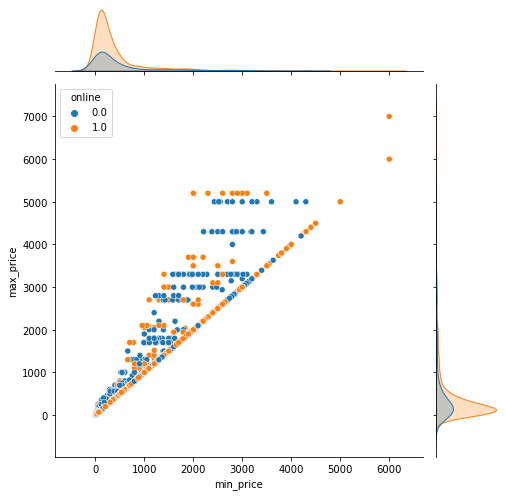

In [53]:
sns.jointplot(data=data7, x="min_price", y="max_price", hue="online", height = 7)

### Min. and max. price vs Category

Home products command a higher pricing power. This isn’t surprising considering there are a lot of home products in this dataset, and that home products are generally bigger-ticketed.

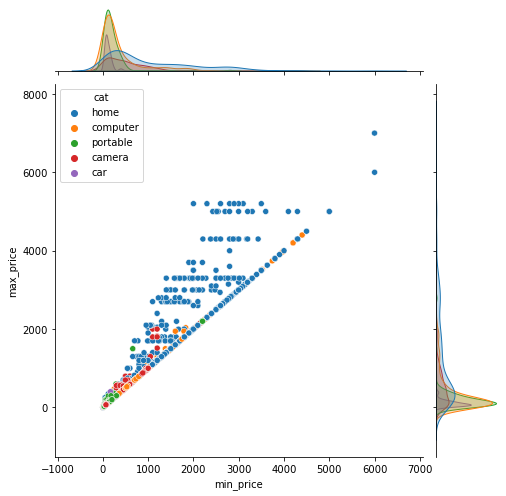

In [54]:
data8 = data7.copy()

data8 = data7[(data7['cat'] != 'other_cat')]

sns.jointplot(data=data8, x="min_price", y="max_price", hue="cat", height = 7)

### Min. and max. price vs Merchant

Looking at merchants, we see that even though Bestbuy has the most number of products on the market, Walmart and Beach Camera seem to be able to command higher prices.

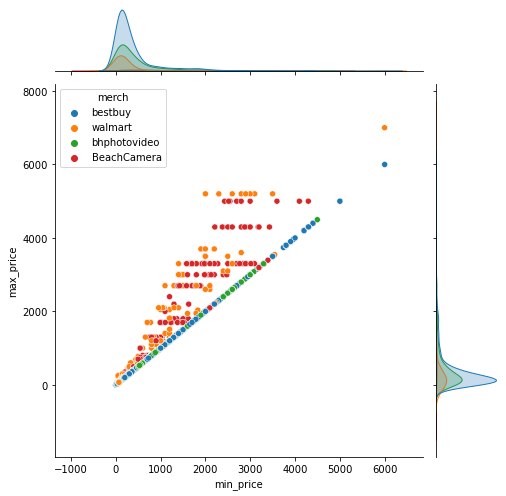

In [55]:
data9 = data7.copy()

data9 = data7[(data7['merch'] != 'other_merch')]

sns.jointplot(data=data9, x="min_price", y="max_price", hue="merch", height = 7)

### Min. and max. price vs Brand

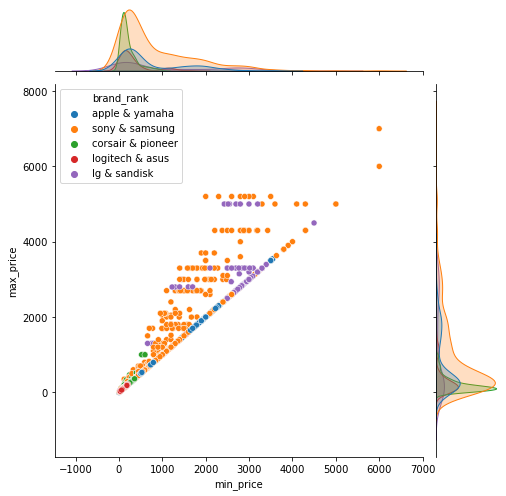

In [56]:
data10 = data7.copy() 

data11 = data10[(data10['brand_rank'] != 'other_brand')]

sns.jointplot(data=data11, x="min_price", y="max_price", hue="brand_rank", height = 7)


## Min. and max. price vs Month

March = spring break (school holidays) + Easter

July = 4th of July (national holidays)

November = Thanksgiving and Black Friday

December = Xmas and New Year


Top 3 months = March, July, December

People willing to spend during holidays/festive period even when prices are high.

Merchants can up their prices and stock during these months.

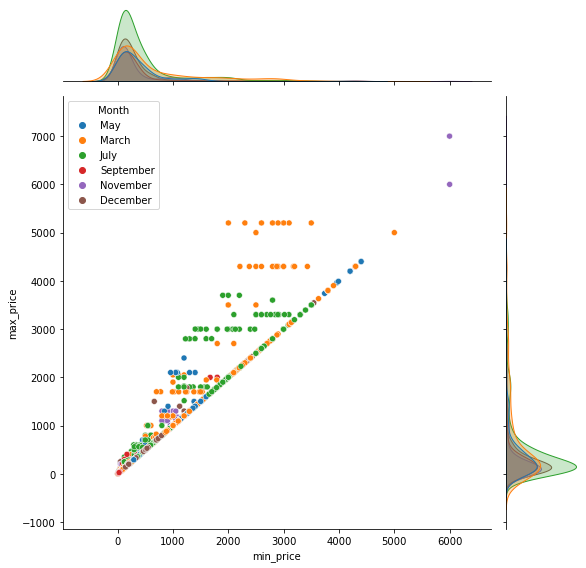

In [57]:
data_m = data7[data7.Month.isin(['March','July','December','May','November','September'])]
sns.jointplot(data=data_m, x="min_price", y="max_price", hue="Month", height = 8)



##  Duration vs. frequency of price seen

The older the item, the less views it gets.

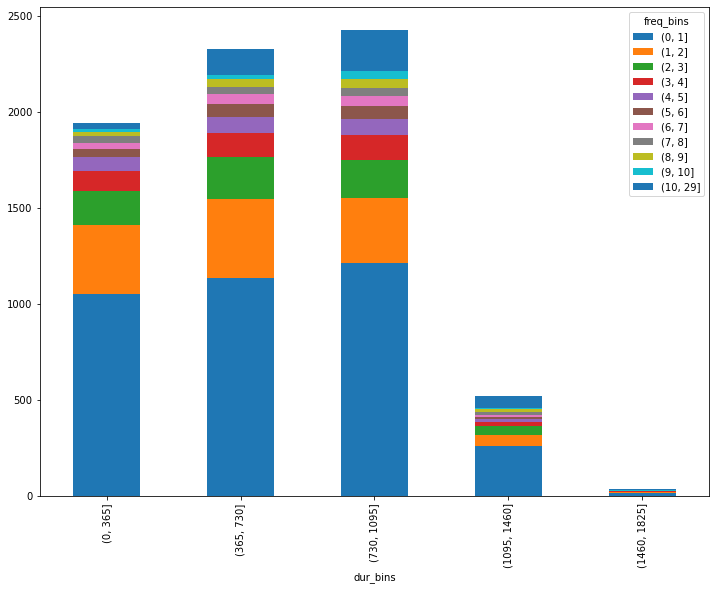

In [58]:
data12 = data7.groupby(['dur_bins','freq_bins']).size().reset_index().pivot(columns='freq_bins',
                                                                           index='dur_bins', values=0)
data12.plot(kind='bar', stacked=True, figsize=(12,9))

## Online and offline platforms

### Frequency of price seen vs Online/offline platforms

Many consumers still check out products in store first, before looking online for a better price. Therefore even though the market is mainly online, our merchants should still stock their physical stores should they intend to have one.

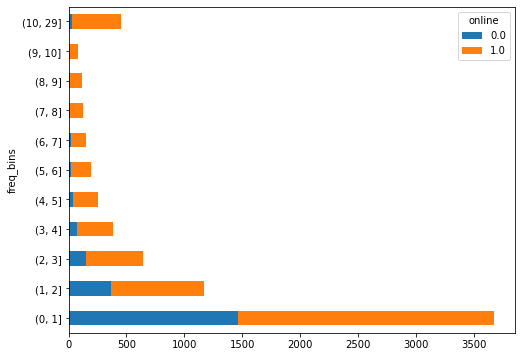

In [59]:
data13 = data7.groupby(['online','freq_bins']).size().reset_index().pivot(columns='online', index='freq_bins', values=0)
data13.plot(kind='barh', stacked=True, figsize=(8,6))

### Merchants vs Online/offline platforms

Starting out as new merchants, it’s important to build a good reputation. That’s why we decided to focus on the top 4 merchants, or platforms, where we think our merchants should sell their products on.

Out of our top 4 platforms, only beach camera has a more predominantly offline presence. This proves the effectiveness of the ecommerce route.

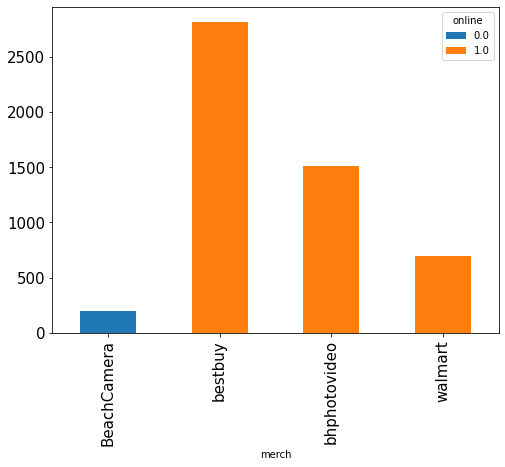

In [60]:
data14 = data7.copy()

data14 = data14[data14.merch != 'other_merch']

data14 = data14.groupby(['online','merch']).size().reset_index().pivot(columns='online', index='merch', values=0)


data14.plot(kind='bar', stacked=True, figsize=(8,6), fontsize = 15)


### Category vs Online/offline platforms

We found out that while most items are stocked online, there is still a significant number of products stock in physical stores, especially for home products.

We believe this is because home products consist of big items like TVs and audio theater systems that most consumers would be more comfortable checking out in person before they make a purchase.

This is an important point to note if our new merchants want to venture into this category in particular.

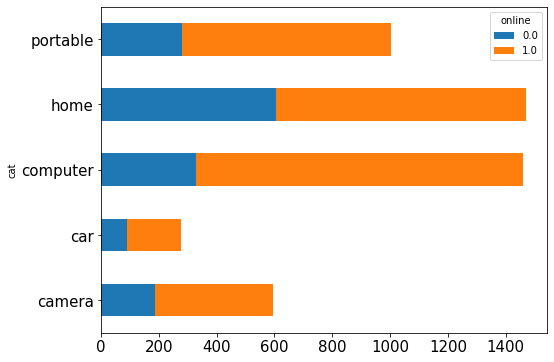

In [61]:
data15_1 = data7.copy()
data15_1 = data7[data7.cat != 'other_cat']

data15_1 = data15_1.groupby(['online','cat']).size().reset_index().pivot(columns='online', index='cat', values=0)
data15_1.plot(kind='barh', stacked=True, figsize=(8,6),fontsize=15)

## Relationship with weekday

### Online platforms vs Weekday

Merchants stock their online and offline platforms around same time of week - Mondays, Tuesdays and Fridays.

In [62]:
data_online = data7[data7.online == 1]
data_online['time_bins'] = pd.cut(x=data_online['dateaddHour'], bins=[0,6,12,18,24])
data_online = data_online.groupby(['weekday','time_bins']).size().reset_index().pivot(columns='time_bins', index='weekday', values=0)

data_online

<ipython-input-62-12fc68d77b9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_online['time_bins'] = pd.cut(x=data_online['dateaddHour'], bins=[0,6,12,18,24])


time_bins,"(0, 6]","(6, 12]","(12, 18]","(18, 24]"
weekday,,,,
Friday,190,128,445,116
Monday,87,159,549,348
Saturday,331,22,72,60
Sunday,122,48,76,127
Thursday,158,88,45,111
Tuesday,189,137,235,398
Wednesday,137,222,150,87


In [63]:
data_weekdayonline = data_online.copy()

In [64]:
interval_map = {x: str(x) for x in data_weekdayonline.columns}

In [65]:
interval_map

{Interval(0, 6, closed='right'): '(0, 6]',
 Interval(6, 12, closed='right'): '(6, 12]',
 Interval(12, 18, closed='right'): '(12, 18]',
 Interval(18, 24, closed='right'): '(18, 24]'}

In [66]:
# Converting Interval to string type for columns
data_weekdayonline = data_weekdayonline.rename(interval_map, axis=1)

In [67]:
data_weekdayonline.columns

Index(['(0, 6]', '(6, 12]', '(12, 18]', '(18, 24]'], dtype='object', name='time_bins')

In [68]:
day_map = {"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday":5, "Saturday": 6, "Sunday":7 }
data_weekdayonline["DayNum"] = data_weekdayonline.index.map(lambda x: day_map[x]) 

In [69]:
data_weekdayonline = data_weekdayonline.sort_values("DayNum", ascending = False)

In [70]:
data_weekdayonline

time_bins,"(0, 6]","(6, 12]","(12, 18]","(18, 24]",DayNum
weekday,,,,,
Sunday,122,48,76,127,7
Saturday,331,22,72,60,6
Friday,190,128,445,116,5
Thursday,158,88,45,111,4
Wednesday,137,222,150,87,3
Tuesday,189,137,235,398,2
Monday,87,159,549,348,1


In [71]:
data_weekdayonline = data_weekdayonline.drop("DayNum", axis=1)

Text(0.5, 1.0, 'Online platforms')

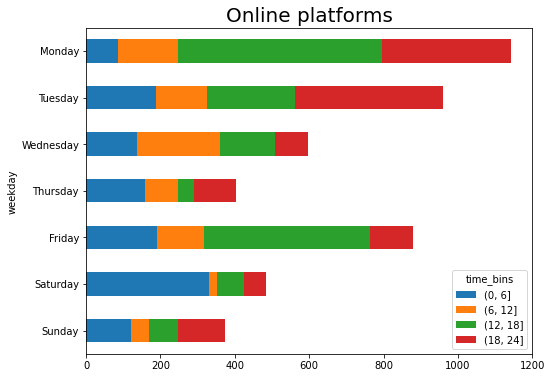

In [72]:
data_weekdayonline.plot(kind='barh', stacked=True, figsize=(8,6))
plt.title('Online platforms', fontsize = 20)

### Offline platforms vs Weekday

In [73]:
data_offline = data7[data7.online == 0]
data_offline['time_bins'] = pd.cut(x=data_offline['dateaddHour'], bins=[0,6,12,18,24])
data_offline = data_offline.groupby(['weekday','time_bins']).size().reset_index().pivot(columns='time_bins', index='weekday', values=0)

data_offline

<ipython-input-73-92962b693678>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_offline['time_bins'] = pd.cut(x=data_offline['dateaddHour'], bins=[0,6,12,18,24])


time_bins,"(0, 6]","(6, 12]","(12, 18]","(18, 24]"
weekday,,,,
Friday,93,41,198,50
Monday,32,46,301,104
Saturday,150,4,14,16
Sunday,50,24,38,49
Thursday,83,30,18,21
Tuesday,50,100,65,250
Wednesday,69,78,67,38


In [74]:
data_weekdayoffline = data_offline.copy()

In [75]:
# Converting Interval to string type for columns
data_weekdayoffline = data_weekdayoffline.rename(interval_map, axis=1)

In [76]:
data_weekdayoffline.columns

Index(['(0, 6]', '(6, 12]', '(12, 18]', '(18, 24]'], dtype='object', name='time_bins')

In [77]:
data_weekdayoffline["DayNum"] = data_weekdayoffline.index.map(lambda x: day_map[x]) 

In [78]:
data_weekdayoffline = data_weekdayoffline.sort_values("DayNum", ascending = False)

In [79]:
data_weekdayoffline

time_bins,"(0, 6]","(6, 12]","(12, 18]","(18, 24]",DayNum
weekday,,,,,
Sunday,50,24,38,49,7
Saturday,150,4,14,16,6
Friday,93,41,198,50,5
Thursday,83,30,18,21,4
Wednesday,69,78,67,38,3
Tuesday,50,100,65,250,2
Monday,32,46,301,104,1


In [80]:
data_weekdayoffline = data_weekdayoffline.drop("DayNum", axis=1)

Text(0.5, 1.0, 'Offline platforms')

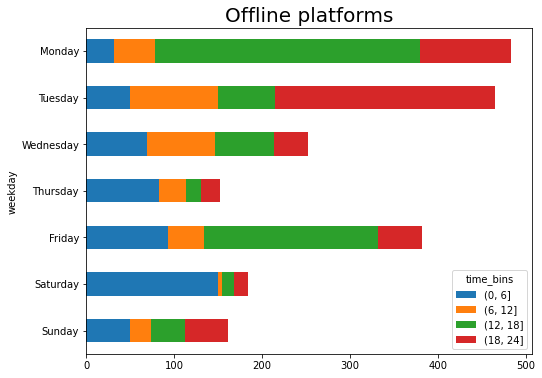

In [81]:
data_weekdayoffline.plot(kind='barh', stacked=True, figsize=(8,6))
plt.title('Offline platforms', fontsize = 20)

### Month added vs Weekday

People willing to spend during holidays/festive period even when prices are high.
Merchants can up their prices and stock during these months.

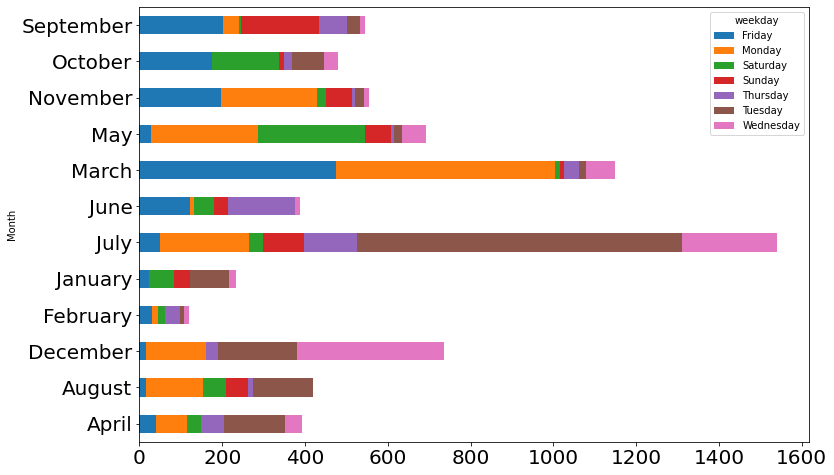

In [82]:
data_weekday_month = data7.groupby(['weekday','Month']).size().reset_index().pivot(columns='weekday', index='Month', values=0)
data_weekday_month.plot(kind='barh', stacked=True,figsize=(12,8),fontsize=20)

## Brand vs Merchant vs Category

### Brands vs. merchant

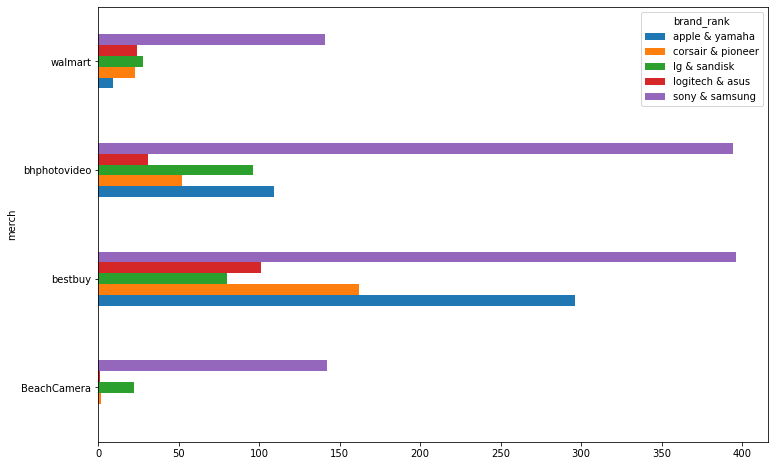

In [83]:
data16 = data7.copy()

data16 = data16[data16.merch != 'other_merch']

data16_1 = data16[data16.brand_rank != 'other_brand']

data16_1 = data16_1.groupby(['brand_rank','merch']).size().reset_index().pivot(columns='brand_rank', index='merch', values=0)
data16_1.plot(kind='barh', figsize=(12,8))

# Distribution of brands across the top merchants

### Category vs Merchant

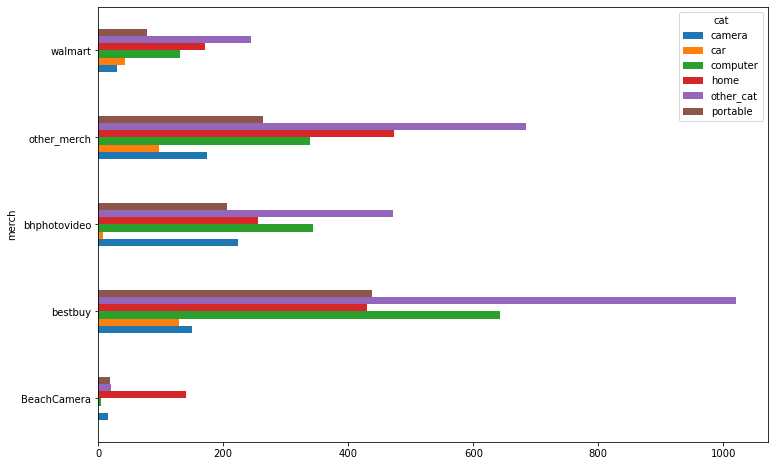

In [84]:
data18 = data7.groupby(['cat','merch']).size().reset_index().pivot(columns='cat', index='merch', values=0)
data18.plot(kind='barh', figsize=(12,8))

# Bestbuy has biggest selection of items.
# Only bhphotovideo has a bigger selection of camera related items than Bestbuy.

## Category vs Brand

Those who want to go into home products can explore top popular brands like Sony and Samsung, whereas those who want to go into computer products can go into explore more brands like Logitech and Asus on top of Sony and Samsung.

The reason why Sony and Samsung were grouped together was because their products take up more than 10% each of the dataset. The next two were Apple and Yamaha but only at 3% each.

We feel that the rest of the brands did not count enough to be significant to consumers and our new merchants, hence we chose to focus on these top ten brands.


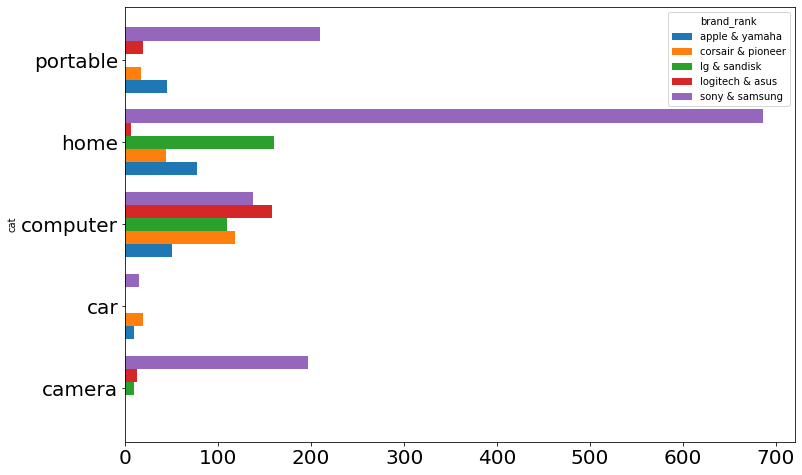

In [85]:
data19 = data7.copy()

data19 = data19[data19.cat != 'other_cat']

data19_1 = data19[data19.brand_rank != 'other_brand']

data19_1 = data19_1.groupby(['cat','brand_rank']).size().reset_index().pivot(columns='brand_rank', index='cat', values=0)
data19_1.plot(kind='barh', figsize=(12,8), fontsize = 20, width = 0.8)



# Machine Learning - Model selection

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV
from sklearn.linear_model import Ridge , Lasso , ElasticNet
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor , RandomForestRegressor , AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [87]:
featuresR = data7[['price_dateseen','dateaddHour','weekday','Month','durationD','bestbuy','bhphotovideo',
                   'walmart','BeachCamera','other_merch','online','car','camera','portable',
                   'home','computer','other_cat','sony_samsung','apple_yamaha',
                   'corsair_pioneer','lg_sandisk','logitech_asus','other_brand','weightD']]
featuresR = pd.concat([featuresR , pd.get_dummies(featuresR.weekday)] , axis=1)
featuresR = pd.concat([featuresR , pd.get_dummies(featuresR.Month)] , axis=1)
featuresR

,price_dateseen,dateaddHour,weekday,Month,durationD,bestbuy,bhphotovideo,walmart,BeachCamera,other_merch,online,car,camera,portable,home,computer,other_cat,sony_samsung,apple_yamaha,corsair_pioneer,...,weightD,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September
0,4,12,Monday,April,1125,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,14891.199654,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,14,Monday,May,1122,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6356.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,14,Monday,May,1122,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6356.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,14,Monday,May,1122,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6356.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,14,Monday,May,1122,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6356.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,1,18,Friday,June,733,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,817.199978,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7245,1,18,Friday,June,733,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,817.199978,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7246,1,18,Friday,June,733,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,817.199978,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7247,1,18,Friday,June,733,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,817.199978,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [88]:
features = featuresR.drop(['weekday' , 'Month'] , axis=1)
features

,price_dateseen,dateaddHour,durationD,bestbuy,bhphotovideo,walmart,BeachCamera,other_merch,online,car,camera,portable,home,computer,other_cat,sony_samsung,apple_yamaha,corsair_pioneer,lg_sandisk,logitech_asus,...,weightD,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September
0,4,12,1125,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14891.199654,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,14,1122,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6356.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,14,1122,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6356.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,14,1122,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6356.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,14,1122,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6356.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7244,1,18,733,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,817.199978,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7245,1,18,733,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,817.199978,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7246,1,18,733,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,817.199978,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7247,1,18,733,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,817.199978,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [89]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7249 entries, 0 to 7248
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price_dateseen   7249 non-null   int32  
 1   dateaddHour      7249 non-null   int64  
 2   durationD        7249 non-null   int64  
 3   bestbuy          7249 non-null   float64
 4   bhphotovideo     7249 non-null   float64
 5   walmart          7249 non-null   float64
 6   BeachCamera      7249 non-null   float64
 7   other_merch      7249 non-null   float64
 8   online           7249 non-null   float64
 9   car              7249 non-null   float64
 10  camera           7249 non-null   float64
 11  portable         7249 non-null   float64
 12  home             7249 non-null   float64
 13  computer         7249 non-null   float64
 14  other_cat        7249 non-null   float64
 15  sony_samsung     7249 non-null   float64
 16  apple_yamaha     7249 non-null   float64
 17  corsair_pionee

In [90]:
y = data ['min_price']
X = features
y

0       104.99
1        64.99
2        69.00
3        69.99
4        66.99
         ...  
7244     79.99
7245     68.75
7246     70.99
7247     71.99
7248     67.77
Name: min_price, Length: 7249, dtype: float64

In [91]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [92]:
# Scale X_train

sc = StandardScaler()

scaled_X = sc.fit_transform(X_train)
X_train_s = pd.DataFrame(scaled_X , columns= X_train.columns)

X_train_s.head()

,price_dateseen,dateaddHour,durationD,bestbuy,bhphotovideo,walmart,BeachCamera,other_merch,online,car,camera,portable,home,computer,other_cat,sony_samsung,apple_yamaha,corsair_pioneer,lg_sandisk,logitech_asus,...,weightD,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September
0,1.609223,0.471659,-0.534500,-0.785284,1.935329,-0.327587,-0.168986,-0.628487,0.659845,-0.194318,-0.303125,2.462384,1.692926,-0.502478,-0.724464,-0.522863,-0.266297,-0.231924,-0.21622,-0.178467,...,1.723690,2.071487,-0.544202,-0.329198,-0.286539,-0.292834,-0.521259,-0.362646,-0.24047,-0.253440,-0.33496,-0.134473,-0.180005,-0.517244,-0.236837,2.283732,-0.320766,-0.288999,-0.264809,-0.282645
1,-0.579562,1.405750,1.167738,-0.785284,-0.516708,-0.327587,-0.168986,1.591122,-1.515506,-0.194318,-0.303125,-0.406110,-0.590693,-0.502478,1.380330,-0.522863,-0.266297,-0.231924,-0.21622,-0.178467,...,0.467377,-0.482745,-0.544202,-0.329198,-0.286539,3.414904,-0.521259,-0.362646,-0.24047,-0.253440,-0.33496,-0.134473,-0.180005,-0.517244,-0.236837,-0.437880,-0.320766,-0.288999,-0.264809,3.538005
2,-0.305964,-1.529964,-0.749584,-0.785284,-0.516708,-0.327587,5.917654,-0.628487,-1.515506,-0.194318,-0.303125,2.462384,1.692926,-0.502478,-0.724464,1.912546,-0.266297,-0.231924,-0.21622,-0.178467,...,-0.520563,-0.482745,-0.544202,3.037682,-0.286539,-0.292834,-0.521259,-0.362646,-0.24047,-0.253440,-0.33496,-0.134473,-0.180005,-0.517244,-0.236837,-0.437880,3.117537,-0.288999,-0.264809,-0.282645
3,-0.579562,0.071335,-0.362432,-0.785284,-0.516708,-0.327587,-0.168986,1.591122,-1.515506,-0.194318,-0.303125,-0.406110,1.692926,-0.502478,-0.724464,-0.522863,-0.266297,-0.231924,-0.21622,-0.178467,...,1.319678,2.071487,-0.544202,-0.329198,-0.286539,-0.292834,-0.521259,-0.362646,-0.24047,-0.253440,-0.33496,-0.134473,5.555415,-0.517244,-0.236837,-0.437880,-0.320766,-0.288999,-0.264809,-0.282645
4,0.241232,0.738542,1.195392,-0.785284,1.935329,-0.327587,-0.168986,-0.628487,0.659845,-0.194318,-0.303125,-0.406110,1.692926,-0.502478,-0.724464,-0.522863,3.755205,-0.231924,-0.21622,-0.178467,...,-0.213356,-0.482745,-0.544202,-0.329198,-0.286539,-0.292834,1.918434,-0.362646,-0.24047,3.945703,-0.33496,-0.134473,-0.180005,-0.517244,-0.236837,-0.437880,-0.320766,-0.288999,-0.264809,-0.282645


In [93]:
# Transform  X_test in same way as X_train

scaled_Xtest = sc.fit_transform(X_test)
X_test_s = pd.DataFrame(scaled_Xtest , columns= X_test.columns)
k = X_test_s.shape[1] # store no. of features as k
n = len(X_test_s) # store no. of rows as n

X_test_s.head()

,price_dateseen,dateaddHour,durationD,bestbuy,bhphotovideo,walmart,BeachCamera,other_merch,online,car,camera,portable,home,computer,other_cat,sony_samsung,apple_yamaha,corsair_pioneer,lg_sandisk,logitech_asus,...,weightD,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September
0,-0.571127,0.081702,-0.691257,-0.837782,-0.496765,-0.321715,-0.16843,1.651516,-1.560775,-0.220103,-0.303096,-0.413816,-0.596999,-0.54068,1.500374,-0.493526,-0.277968,-0.23355,-0.196677,5.291503,...,-0.486953,-0.481607,-0.547068,-0.333333,-0.304451,-0.269231,-0.513972,2.708013,4.281744,-0.225221,-0.339683,-0.108918,-0.192863,-0.528950,-0.240046,-0.41724,-0.340945,-0.282263,-0.272166,-0.296263
1,3.634124,0.486490,1.435449,1.193629,-0.496765,-0.321715,-0.16843,-0.605504,0.640707,-0.220103,-0.303096,-0.413816,-0.596999,-0.54068,1.500374,-0.493526,-0.277968,-0.23355,-0.196677,-0.188982,...,0.366188,-0.481607,-0.547068,3.000000,-0.304451,-0.269231,-0.513972,-0.369274,-0.233550,-0.225221,-0.339683,-0.108918,5.185038,-0.528950,-0.240046,-0.41724,-0.340945,-0.282263,-0.272166,-0.296263
2,-0.571127,-1.537450,-0.856735,-0.837782,-0.496765,-0.321715,-0.16843,1.651516,-1.560775,-0.220103,-0.303096,-0.413816,-0.596999,-0.54068,1.500374,-0.493526,-0.277968,-0.23355,-0.196677,-0.188982,...,-0.486953,-0.481607,-0.547068,-0.333333,3.284603,-0.269231,-0.513972,-0.369274,-0.233550,-0.225221,-0.339683,-0.108918,-0.192863,1.890538,-0.240046,-0.41724,-0.340945,-0.282263,-0.272166,-0.296263
3,-0.571127,0.081702,0.991109,-0.837782,-0.496765,-0.321715,-0.16843,1.651516,-1.560775,-0.220103,-0.303096,-0.413816,-0.596999,-0.54068,1.500374,-0.493526,-0.277968,-0.23355,-0.196677,-0.188982,...,-0.454960,-0.481607,1.827927,-0.333333,-0.304451,-0.269231,-0.513972,-0.369274,-0.233550,-0.225221,-0.339683,-0.108918,-0.192863,-0.528950,-0.240046,-0.41724,2.933027,-0.282263,-0.272166,-0.296263
4,-0.571127,-0.997733,2.869597,-0.837782,-0.496765,-0.321715,-0.16843,1.651516,0.640707,4.543324,-0.303096,-0.413816,-0.596999,-0.54068,-0.666501,-0.493526,-0.277968,-0.23355,-0.196677,-0.188982,...,-0.337653,2.076380,-0.547068,-0.333333,-0.304451,-0.269231,-0.513972,-0.369274,-0.233550,-0.225221,-0.339683,9.181183,-0.192863,-0.528950,-0.240046,-0.41724,-0.340945,-0.282263,-0.272166,-0.296263


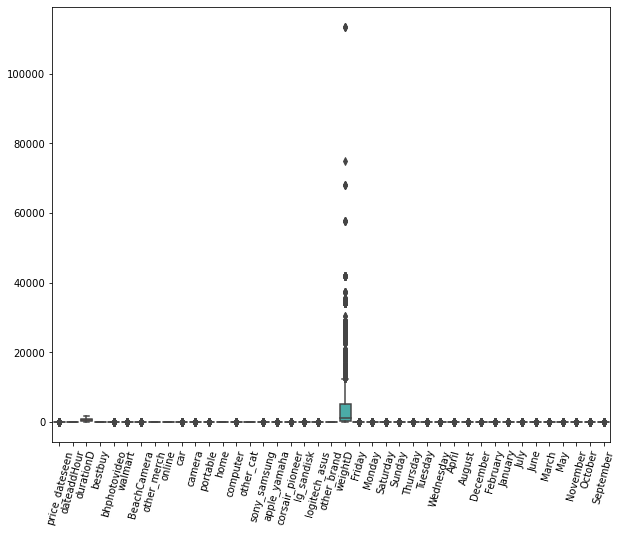

In [94]:
plt.figure(figsize= (10 , 8))
plt.xticks(rotation=75)
sns.boxplot(data= features)

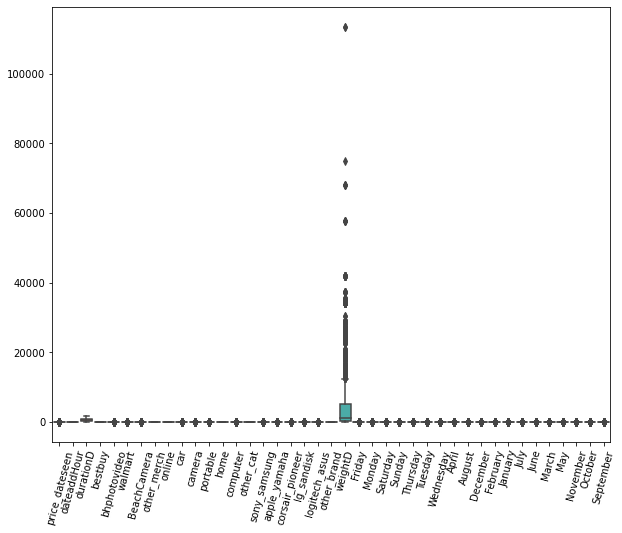

In [95]:
plt.figure(figsize= (10 , 8))
plt.xticks(rotation=75)
sns.boxplot(data= X_train)

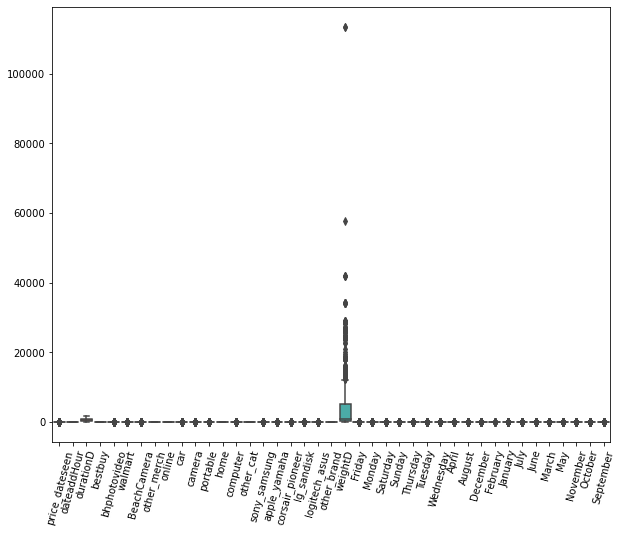

In [96]:
plt.figure(figsize= (10 , 8))
plt.xticks(rotation=75)
sns.boxplot(data= X_test)

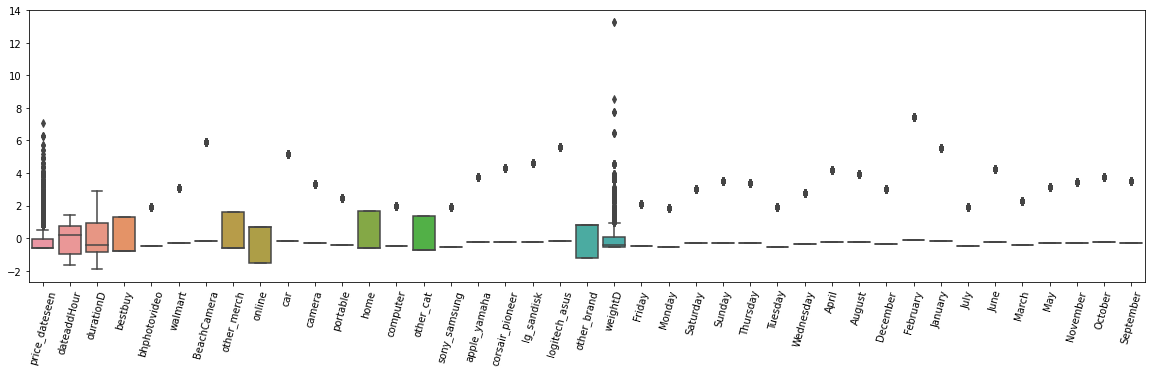

In [97]:
plt.figure(figsize= (20 , 5))
plt.xticks(rotation=75)
sns.boxplot(data= X_train_s)

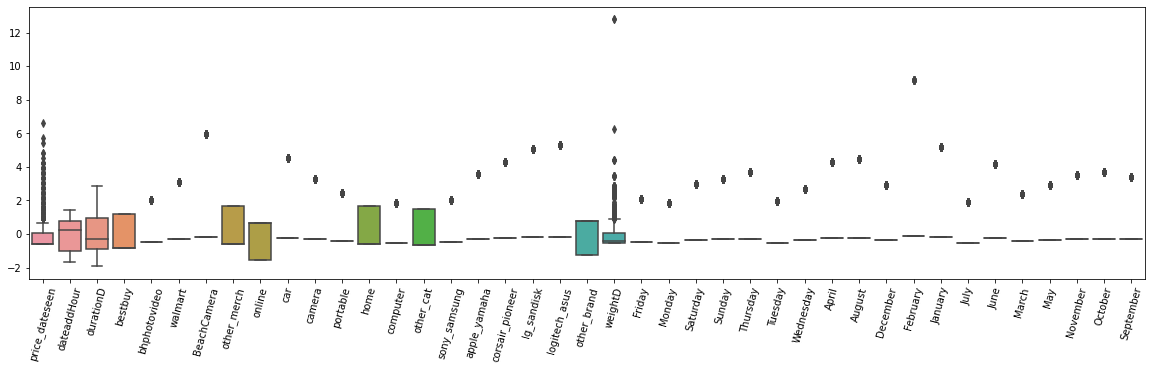

In [98]:
plt.figure(figsize= (20 , 5))
plt.xticks(rotation=75)
sns.boxplot(data= X_test_s)

## Applying linear regression model

In [99]:
# Fit the linear regression model to train set

model_LR = LinearRegression()
model_LR.fit(X_train , y_train)

LinearRegression()

In [100]:
# predict on test set using X_test to get predicted y values

LR_y = model_LR.predict(X_test)
LR_y

array([372.06462097, 165.78494263, 210.38169861, ..., 260.89064026,
        33.80632019, 102.50350952])

In [101]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, LR_y)) , '.3f'))

MAE = mean_absolute_error(y_test, LR_y)

# Adjusted R2 'penalizes' you for adding features that are not contributing much to the model 
# R2 assumes that every single variable explains the variation in the dependent variable. 
# The adjusted R2 tells you the percentage of variation explained by independent variables that actually affect the y.

r2 = r2_score(y_test, LR_y)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)   # no inbuilt function for r2 adjusted so need to code the formula out

print('RMSE =',RMSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

# Adjusted R2 is lower than R2 because it adjusts for larger errors, and usually tends to be lower

RMSE = 528.822 
MAE = 315.588886966679 
R2 = 0.4297978523692 
Adjusted R2 = 0.4131939546043827


In [102]:
coef = model_LR.coef_

# Store coefficients and their names in dataframe
pd.DataFrame(coef.reshape(-1,41), 
             columns = X_test.columns)

,price_dateseen,dateaddHour,durationD,bestbuy,bhphotovideo,walmart,BeachCamera,other_merch,online,car,camera,portable,home,computer,other_cat,sony_samsung,apple_yamaha,corsair_pioneer,lg_sandisk,logitech_asus,...,weightD,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September
0,6.093652,-3.730683,-0.322773,-1.279298e+11,-1.279298e+11,-1.279298e+11,-1.279298e+11,-1.279298e+11,15.228565,-117.922483,266.57477,-159.120513,42.587042,47.530579,-64.08132,-1.963238e+08,-1.963235e+08,-1.963240e+08,-1.963237e+08,-1.963240e+08,...,0.040162,-7.303430e+06,-7.303440e+06,-7.303530e+06,-7.303435e+06,-7.303565e+06,-7.303438e+06,-7.303456e+06,1.900999e+07,1.900966e+07,1.900974e+07,1.900990e+07,1.900966e+07,1.900968e+07,1.901002e+07,1.900991e+07,1.900972e+07,1.900969e+07,1.900976e+07,1.900979e+07


Text(0.5, 1.0, 'Linear Regression Predictions')

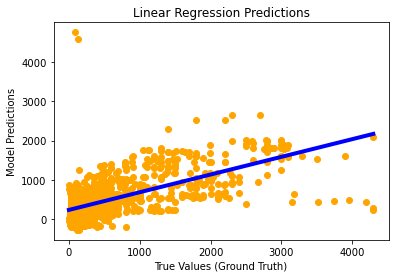

In [103]:
plt.scatter(y_test, LR_y, color = 'orange')
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, LR_y, 1))(np.unique(y_test)),linewidth=4.0, color = 'blue')

#fit in reg line
plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Linear Regression Predictions')

## LR - Ridge Regression

In [104]:
lr_ridge= Ridge()
lr_ridge.fit(X_train_s, y_train)

Ridge()

In [105]:
pred_lr_ridge = lr_ridge.predict(X_test_s)

In [106]:
metrics.r2_score(np.array(y_test) , pred_lr_ridge)

0.4312732311316767

In [107]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, pred_lr_ridge)) , '.3f'))

MAE = mean_absolute_error(y_test, pred_lr_ridge)

# Adjusted R2 'penalizes' you for adding features that are not contributing much to the model 
# R2 assumes that every single variable explains the variation in the dependent variable. 
# The adjusted R2 tells you the percentage of variation explained by independent variables that actually affect the y.

r2 = r2_score(y_test, pred_lr_ridge)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)   # no inbuilt function for r2 adjusted so need to code the formula out

print('RMSE =',RMSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

# Adjusted R2 is lower than R2 because it adjusts for larger errors, and usually tends to be lower

RMSE = 528.137 
MAE = 318.2703340638059 
R2 = 0.4312732311316767 
Adjusted R2 = 0.4147122953904826


In [108]:
coef = lr_ridge.coef_

# Store coefficients and their names in dataframe
pd.DataFrame(coef.reshape(-1,41), 
             columns = X_test.columns)

,price_dateseen,dateaddHour,durationD,bestbuy,bhphotovideo,walmart,BeachCamera,other_merch,online,car,camera,portable,home,computer,other_cat,sony_samsung,apple_yamaha,corsair_pioneer,lg_sandisk,logitech_asus,...,weightD,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September
0,22.224869,-28.036007,-105.021462,-2.892896,0.663628,-28.625365,37.85439,7.510745,7.000088,-22.084183,73.999031,-55.427018,18.437278,19.000927,-30.558417,24.597932,80.235206,-38.436014,37.935537,-29.626027,...,329.503824,11.704778,8.153311,-20.860011,6.603197,-28.281673,8.90935,1.302052,48.225141,-27.640855,-10.906124,16.487518,-21.677059,-42.040485,54.395612,47.894039,-16.234422,-24.806313,-4.896477,1.585065


Text(0.5, 1.0, 'Ridge Regression Predictions')

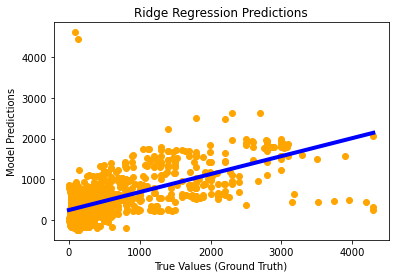

In [109]:
plt.scatter(y_test, pred_lr_ridge, color = 'orange')
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, pred_lr_ridge, 1))(np.unique(y_test)),linewidth=4.0, color = 'blue')

#fit in reg line
plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Ridge Regression Predictions')

In [110]:
data.describe()

,max_price,min_price
count,7249.000000,7249.000000
mean,495.530610,463.963005
std,763.599387,680.504507
min,1.000000,1.000000
25%,79.990000,79.950000
50%,198.990000,189.990000
75%,494.990000,479.990000
max,6999.990000,5999.990000


In [111]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, pred_lr_ridge)) , '.3f'))

MAE = mean_absolute_error(y_test, pred_lr_ridge)

# Adjusted R2 'penalizes' you for adding features that are not contributing much to the model 
# R2 assumes that every single variable explains the variation in the dependent variable. 
# The adjusted R2 tells you the percentage of variation explained by independent variables that actually affect the y.

r2 = r2_score(y_test, pred_lr_ridge)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)   # no inbuilt function for r2 adjusted so need to code the formula out

print('RMSE =',RMSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

# Adjusted R2 is lower than R2 because it adjusts for larger errors, and usually tends to be lower

RMSE = 528.137 
MAE = 318.2703340638059 
R2 = 0.4312732311316767 
Adjusted R2 = 0.4147122953904826


## LR - Lasso

In [112]:
lr_lasso = Lasso()
lr_lasso.fit(X_train_s, y_train)

Lasso()

In [113]:
pred_lr_lasso = lr_lasso.predict(X_test_s)

In [114]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, pred_lr_lasso)) , '.3f'))

MAE = mean_absolute_error(y_test, pred_lr_lasso)

# Adjusted R2 'penalizes' you for adding features that are not contributing much to the model 
# R2 assumes that every single variable explains the variation in the dependent variable. 
# The adjusted R2 tells you the percentage of variation explained by independent variables that actually affect the y.

r2 = r2_score(y_test, pred_lr_lasso)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)   # no inbuilt function for r2 adjusted so need to code the formula out

print('RMSE =',RMSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

# Adjusted R2 is lower than R2 because it adjusts for larger errors, and usually tends to be lower

RMSE = 528.026 
MAE = 317.2267197901717 
R2 = 0.4315112372674269 
Adjusted R2 = 0.414957232102629


In [115]:
coef = lr_lasso.coef_

# Store coefficients and their names in dataframe
pd.DataFrame(coef.reshape(-1,41), 
             columns = X_test.columns)

,price_dateseen,dateaddHour,durationD,bestbuy,bhphotovideo,walmart,BeachCamera,other_merch,online,car,camera,portable,home,computer,other_cat,sony_samsung,apple_yamaha,corsair_pioneer,lg_sandisk,logitech_asus,...,weightD,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September
0,20.734921,-26.211008,-103.480609,-2.3395,0.0,-28.190785,34.527532,0.0,-0.0,-22.138258,71.548627,-55.809401,15.98999,15.055778,-33.011404,65.149089,103.688178,-15.610807,57.716412,-10.714543,...,329.257646,4.403838,-0.0,-24.958485,0.286487,-31.517667,0.0,-3.842975,55.42863,-17.835827,-0.0,19.409987,-14.382874,-25.752265,61.408848,60.238276,-5.033675,-14.083812,2.205628,9.818535


Text(0.5, 1.0, 'Lasso Regression Predictions')

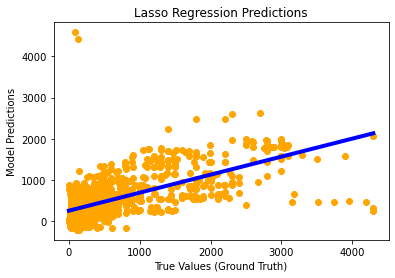

In [116]:
plt.scatter(y_test, pred_lr_lasso, color = 'orange')
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, pred_lr_lasso, 1))(np.unique(y_test)),linewidth=4.0, color = 'blue')

#fit in reg line
plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Lasso Regression Predictions')

## LR - Elastic Net

In [117]:
lr_elasti = ElasticNet()
lr_elasti.fit(X_train_s, y_train)

ElasticNet()

In [118]:
pred_elasti = lr_elasti.predict(X_test_s)

In [119]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, pred_elasti)) , '.3f'))

MAE = mean_absolute_error(y_test, pred_elasti)

# Adjusted R2 'penalizes' you for adding features that are not contributing much to the model 
# R2 assumes that every single variable explains the variation in the dependent variable. 
# The adjusted R2 tells you the percentage of variation explained by independent variables that actually affect the y.

r2 = r2_score(y_test, pred_elasti)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)   # no inbuilt function for r2 adjusted so need to code the formula out

print('RMSE =',RMSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

# Adjusted R2 is lower than R2 because it adjusts for larger errors, and usually tends to be lower

RMSE = 538.049 
MAE = 328.6013846200563 
R2 = 0.40972443791399593 
Adjusted R2 = 0.392536016006662


In [120]:
coef = lr_elasti.coef_

# Store coefficients and their names in dataframe
pd.DataFrame(coef.reshape(-1,41), 
             columns = X_test.columns)

,price_dateseen,dateaddHour,durationD,bestbuy,bhphotovideo,walmart,BeachCamera,other_merch,online,car,camera,portable,home,computer,other_cat,sony_samsung,apple_yamaha,corsair_pioneer,lg_sandisk,logitech_asus,...,weightD,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September
0,12.938994,-14.678831,-71.082602,0.0,3.900971,-21.004726,32.767042,-2.277256,-8.545836,-22.096365,32.457264,-55.594751,53.491375,-4.886341,-36.808127,35.181824,48.006291,-29.356174,38.609763,-16.063506,...,199.799065,13.704703,2.9945,-17.090851,-3.020832,-10.940128,3.615561,0.044223,36.739273,-18.440121,-9.799549,2.334267,-13.614944,-21.663715,43.285328,38.280039,-11.812909,-21.089321,-9.182913,-4.937924


Text(0.5, 1.0, 'Elastic Net Regression Predictions')

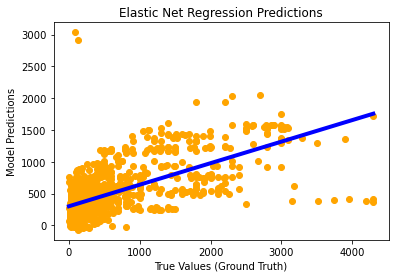

In [121]:
plt.scatter(y_test, pred_elasti, color = 'orange')
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, pred_elasti, 1))(np.unique(y_test)),linewidth=4.0, color = 'blue')

#fit in reg line
plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Elastic Net Regression Predictions')

## Random Forest

In [122]:
model_rfr = RandomForestRegressor(random_state=42)
model_rfr.fit(X_train_s, y_train)
model_rfrX = model_rfr.predict(X_test_s)

In [123]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, model_rfrX)) , '.3f'))

MAE = mean_absolute_error(y_test, model_rfrX)

# Adjusted R2 'penalizes' you for adding features that are not contributing much to the model 
# R2 assumes that every single variable explains the variation in the dependent variable. 
# The adjusted R2 tells you the percentage of variation explained by independent variables that actually affect the y.

r2 = r2_score(y_test, model_rfrX)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)   # no inbuilt function for r2 adjusted so need to code the formula out

print('RMSE =',RMSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

# Adjusted R2 is lower than R2 because it adjusts for larger errors, and usually tends to be lower

RMSE = 270.836 
MAE = 141.81592973048743 
R2 = 0.8504376569646447 
Adjusted R2 = 0.8460825035097799


Text(0.5, 1.0, 'Random Forest Regression Predictions')

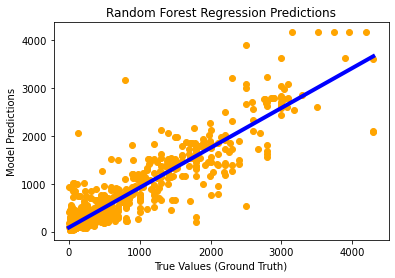

In [124]:
plt.scatter(y_test, model_rfrX, color = 'orange')
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, model_rfrX, 1))(np.unique(y_test)),linewidth=4.0, color = 'blue')

#fit in reg line
plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Random Forest Regression Predictions')

## RF - Feature importance

Chosen: Random Forest (Most Robust, Simple and Cost Effective)

The more you train, the worse the score.. Unless your model is not very good to begin with..
Random Forest feature Importance is inline with Profile Analysis done in Slides 4-7.
Xgboost top few feature importance is also inline with the EDA done.

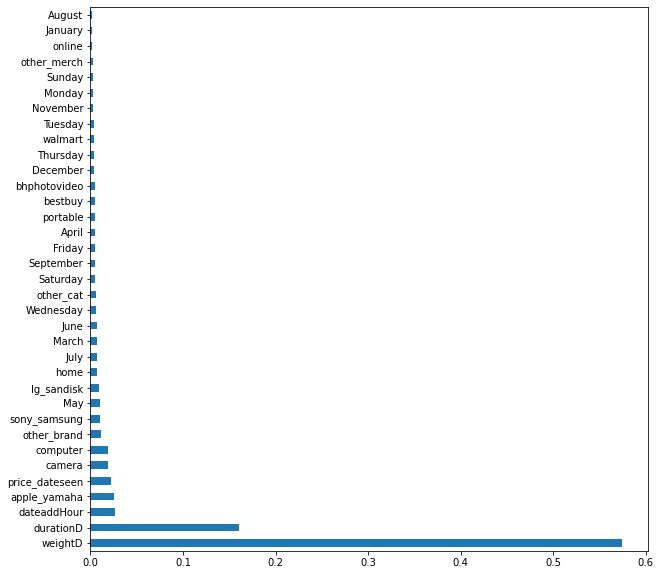

In [125]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
feat_importances = pd.Series(model_rfr.feature_importances_, index=features.columns)
feat_importances.nlargest(35).plot(kind='barh')

## XGBoost

In [126]:
xgb_sklearn = xgb.sklearn.XGBRegressor()
xgb_sklearn.fit(X_train_s , y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [127]:
result = xgb_sklearn.predict(X_test_s)

In [128]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, result)) , '.3f'))

MAE = mean_absolute_error(y_test, result)

# Adjusted R2 'penalizes' you for adding features that are not contributing much to the model 
# R2 assumes that every single variable explains the variation in the dependent variable. 
# The adjusted R2 tells you the percentage of variation explained by independent variables that actually affect the y.

r2 = r2_score(y_test, result)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)   # no inbuilt function for r2 adjusted so need to code the formula out

print('RMSE =',RMSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

# Adjusted R2 is lower than R2 because it adjusts for larger errors, and usually tends to be lower

RMSE = 288.812 
MAE = 166.75620037381404 
R2 = 0.8299242423972825 
Adjusted R2 = 0.8249717522966351


## XGBoost - Feature importance

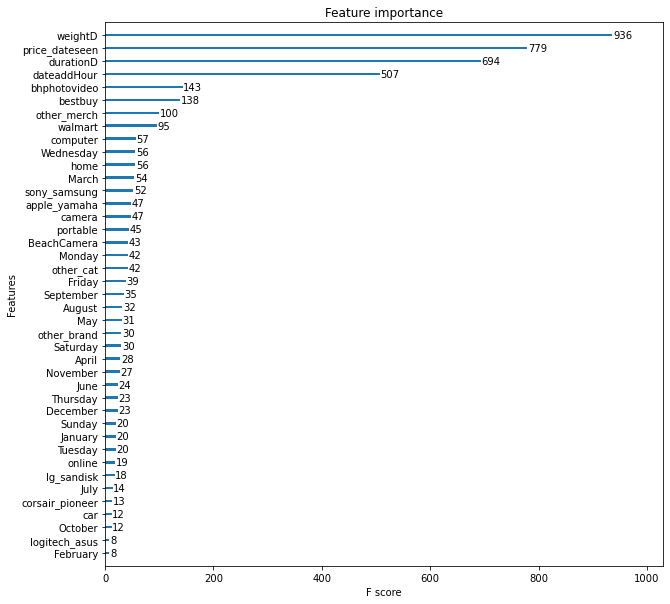

In [129]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 10))
xgb.plot_importance(xgb_sklearn, ax=ax)
plt.grid(b=None)

Text(0.5, 1.0, 'XGBoost Predictions')

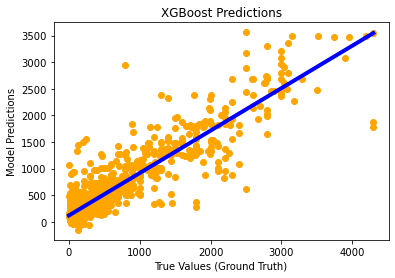

In [130]:
plt.scatter(y_test, result, color = 'orange')
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, result, 1))(np.unique(y_test)),linewidth=4.0, color = 'blue')

#fit in reg line
plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('XGBoost Predictions')

## Cross validation scores

### Random Forest

In [131]:
scores = cross_val_score(model_rfr, X_train_s, y_train,
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [132]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rmse_scores)

Scores: [192.33664843 215.83478206 164.69643874 175.21186805 187.18368745
 239.18648074 303.30264576 267.73883318 200.96307448 184.78216383]
Mean: 213.1236622729885
Standard deviation: 42.00034454834456


In [133]:
rfr_scores = cross_val_score(model_rfr, X_train_s, y_train,
scoring="r2", cv=10)

# xgb_rmse_scores = np.sqrt(-xgb_scores)
display_scores(rfr_scores)

Scores: [0.92034885 0.89994504 0.91838727 0.93048422 0.91915639 0.89994639
 0.83092185 0.83357758 0.91724699 0.90911732]
Mean: 0.8979131892200805
Standard deviation: 0.034013517997698035


### LR - Ridge

In [134]:
lin_scores = cross_val_score(lr_ridge, X_train_s, y_train,
scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [507.78531462 504.71874523 472.53633685 519.16796536 435.43230386
 525.65823207 538.0744467  453.812478   483.64802888 390.55454236]
Mean: 483.13883939219886
Standard deviation: 43.60909548939941


In [135]:
lin_scores = cross_val_score(lr_ridge, X_train_s, y_train,
scoring="r2", cv=10)

# xgb_rmse_scores = np.sqrt(-xgb_scores)
display_scores(lin_scores)

Scores: [0.4448271  0.45286483 0.32816919 0.38965959 0.56252727 0.51675601
 0.46786744 0.52187443 0.52069705 0.59400153]
Mean: 0.4799244438569851
Standard deviation: 0.07609362587771278


In [136]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, result)) , '.3f'))

MAE = mean_absolute_error(y_test, result)

# Adjusted R2 'penalizes' you for adding features that are not contributing much to the model 
# R2 assumes that every single variable explains the variation in the dependent variable. 
# The adjusted R2 tells you the percentage of variation explained by independent variables that actually affect the y.

r2 = r2_score(y_test, result)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)   # no inbuilt function for r2 adjusted so need to code the formula out

print('RMSE =',RMSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

# Adjusted R2 is lower than R2 because it adjusts for larger errors, and usually tends to be lower

RMSE = 288.812 
MAE = 166.75620037381404 
R2 = 0.8299242423972825 
Adjusted R2 = 0.8249717522966351


### XGBoost

In [137]:
xgb_scores = cross_val_score(xgb_sklearn, X_train_s, y_train,
scoring="neg_mean_squared_error", cv=10)

xgb_rmse_scores = np.sqrt(-xgb_scores)
display_scores(xgb_rmse_scores)

Scores: [200.95309141 233.0604811  165.73172313 197.7516958  190.99262039
 234.90534459 300.33216964 270.68567671 206.02614117 230.41646851]
Mean: 223.08554124556449
Standard deviation: 37.77281082718862


In [138]:
xgb_scores = cross_val_score(xgb_sklearn, X_train_s, y_train,
scoring="r2", cv=10)

# xgb_rmse_scores = np.sqrt(-xgb_scores)
display_scores(xgb_scores)

Scores: [0.91305245 0.88333703 0.91735801 0.91144832 0.9158328  0.903496
 0.83421745 0.82989399 0.9130247  0.85868507]
Mean: 0.8880345825058005
Standard deviation: 0.032909474509082895


### LR - Lasso

In [139]:
lasso_scores = cross_val_score(lr_lasso, X_train_s, y_train,
scoring="neg_mean_squared_error", cv=10)

lasso_rmse_scores = np.sqrt(-lasso_scores)
display_scores(lasso_rmse_scores)

Scores: [507.23714006 505.02430903 472.21065597 519.38199609 435.45567207
 526.11363117 538.00636107 453.25952827 484.07745429 390.24313149]
Mean: 483.10098794994866
Standard deviation: 43.7571800250686


In [140]:
lasso_scores = cross_val_score(lr_lasso, X_train_s, y_train,
scoring="r2", cv=10)

# xgb_rmse_scores = np.sqrt(-xgb_scores)
display_scores(lasso_scores)

Scores: [0.44602512 0.45220214 0.32909494 0.38915626 0.56248032 0.51591834
 0.46800209 0.52303887 0.51984554 0.59464872]
Mean: 0.48004123361662526
Standard deviation: 0.07600877477298465


### LR - Elastic Net

In [141]:
elastic_scores = cross_val_score(lr_elasti, X_train_s, y_train,
scoring="neg_mean_squared_error", cv=10)

elastic_rmse_scores = np.sqrt(-elastic_scores)
display_scores(elastic_rmse_scores)

Scores: [520.417356   518.04577972 454.52511544 523.60310373 459.12053537
 562.55659744 542.15026406 471.22342026 515.2153065  411.3363033 ]
Mean: 497.819378181947
Standard deviation: 44.27413532216826


In [142]:
elastic_scores = cross_val_score(lr_elasti, X_train_s, y_train,
scoring="r2", cv=10)

# xgb_rmse_scores = np.sqrt(-xgb_scores)
display_scores(elastic_scores)

Scores: [0.41686175 0.42358929 0.37840821 0.37918704 0.51363409 0.4465327
 0.45977529 0.48448319 0.45608784 0.54964489]
Mean: 0.45082042754261425
Standard deviation: 0.05219284408198297


## Parameters

In [143]:
param_grid_rfr = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3,5,6,7,9],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
#     'min_samples_leaf': [1, 2, 4],
#     'min_samples_split': [2, 5, 10],
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3,5,6,7,9],
    'learning_rate': [0.0005, 0.0015, 0.0025],
    'reg_alpha': [0.2, 0.3, 0.5],
    'reg_lambda': [0.2, 0.3, 0.5],
    'gamma': [0.2, 0.3, 0.5]
}

In [144]:
optimal_params_rfr = GridSearchCV(
                    estimator = model_rfr,
#                     objective = 'binary:logistic',
                    param_grid = param_grid_rfr,
                    scoring = 'neg_mean_squared_error', ## f1 see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                    verbose = 1, 
                    cv = 5, n_jobs = -1

#                     ,return_train_score=True
)

optimal_params_rfr.fit(X_train_s, 
                   y_train, 
#                    early_stopping_rounds=5,   
#                   eval_set=[(X_test_s, y_test)],   c evaluate auc upon the test set
#                    verbose=False
                      )

print(optimal_params_rfr.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.5min finished


{'bootstrap': True, 'max_depth': 9, 'max_features': 'auto', 'n_estimators': 300}


In [145]:
result_rfrt = optimal_params_rfr.predict(X_test)

In [146]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, result_rfrt)) , '.3f'))

MAE = mean_absolute_error(y_test, result_rfrt)

# Adjusted R2 'penalizes' you for adding features that are not contributing much to the model 
# R2 assumes that every single variable explains the variation in the dependent variable. 
# The adjusted R2 tells you the percentage of variation explained by independent variables that actually affect the y.

r2 = r2_score(y_test, result_rfrt)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)   # no inbuilt function for r2 adjusted so need to code the formula out

print('RMSE =',RMSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

# Adjusted R2 is lower than R2 because it adjusts for larger errors, and usually tends to be lower

RMSE = 722.552 
MAE = 538.7496036122623 
R2 = -0.06450605999818926 
Adjusted R2 = -0.09550375066575012


Text(0.5, 1.0, 'XGBoost (tuned) Regression Predictions')

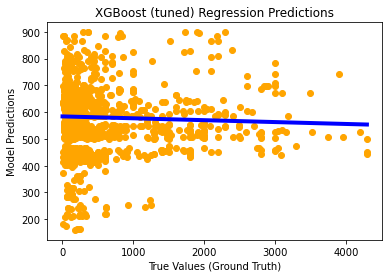

In [147]:
plt.scatter(y_test, result_rfrt, color = 'orange')
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, result_rfrt, 1))(np.unique(y_test)),linewidth=4.0, color = 'blue')

#fit in reg line
plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('XGBoost (tuned) Regression Predictions')

In [148]:
optimal_params_xgb = GridSearchCV(
                    estimator = xgb_sklearn,
#                     objective = 'binary:logistic',
                    param_grid = param_grid_xgb,
                    scoring = 'neg_mean_squared_error', ## f1 see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                    verbose = 1, 
                    cv = 5, n_jobs = -1

#                     ,return_train_score=True
)

optimal_params_xgb.fit(X_train_s, 
                   y_train, 
                   early_stopping_rounds=5,   
                   eval_set=[(X_test_s, y_test)],   # evaluate auc upon the test set
                   verbose=False)

print(optimal_params_xgb.best_params_)

Fitting 5 folds for each of 1215 candidates, totalling 6075 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 2438 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 3188 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 4038 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 4988 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 6038 tasks      | elapsed: 23.4min
[Parallel(n_jobs=-1)]: Done 6075 out of 6075 | elapsed: 23.7min finished


{'gamma': 0.3, 'learning_rate': 0.0025, 'max_depth': 9, 'n_estimators': 300, 'reg_alpha': 0.3, 'reg_lambda': 0.2}


In [149]:
result_xgbt = optimal_params_xgb.predict(X_test)

In [150]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, result_xgbt)) , '.3f'))

MAE = mean_absolute_error(y_test, result_xgbt)

# Adjusted R2 'penalizes' you for adding features that are not contributing much to the model 
# R2 assumes that every single variable explains the variation in the dependent variable. 
# The adjusted R2 tells you the percentage of variation explained by independent variables that actually affect the y.

r2 = r2_score(y_test, result_xgbt)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)   # no inbuilt function for r2 adjusted so need to code the formula out

print('RMSE =',RMSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

# Adjusted R2 is lower than R2 because it adjusts for larger errors, and usually tends to be lower

RMSE = 776.87 
MAE = 414.90942285850787 
R2 = -0.23057094576253645 
Adjusted R2 = -0.26640433267749675


Text(0.5, 1.0, 'XGBoost (tuned) Regression Predictions')

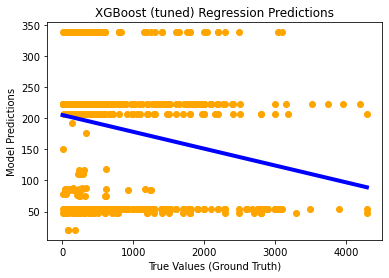

In [151]:
plt.scatter(y_test, result_xgbt, color = 'orange')
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, result_xgbt, 1))(np.unique(y_test)),linewidth=4.0, color = 'blue')

#fit in reg line
plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('XGBoost (tuned) Regression Predictions')

# In a nutshell...

Random Forest is uses a bagging ensemble technique and produces the most robust performance (across other models).

To mitigate over-fit models during optimization and boosting of models, we have added regularization techniques such as “reg_lambda” and “gamma” for Xgboost classification models (instead of L1/L2/Elastic Net for regression models).

In the case of Random Forest, we have reduce over-fitting via the estimators, max features and depth.

Random Forest seems to explain feature importance better (more relevant domain knowledge).

# End of notebook